In [221]:
# !python -m pip uninstall scikit-learn --yes

In [222]:
# pip install scikit-learn==1.2.2 --user

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [225]:
# import sklearn
# print(sklearn.__version__)

In [226]:
from imblearn.over_sampling import SMOTENC
from sklearn.utils import resample

In [227]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [228]:
# file_path = './data/data_iu_proccessed_p3.csv'
file_path = './data/data_iu_proccessed_p3_v2.csv'

file_path_test = './data/data_iu_proccessed_p3_20231.csv'

# Read the CSV file with specified data types
df = pd.read_csv(file_path)
df_20231 = pd.read_csv(file_path_test)

df = pd.concat([df, df_20231], ignore_index=True)

In [229]:
df.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,90.0,4,0,0,0,...,0,0,0,0,0,0,0,3,Nguyen Van Phuong,unassigned
1,1,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,36.0,4,0,0,0,...,0,0,0,0,0,0,0,1,multi,unassigned
2,2,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,46.0,2,0,0,0,...,5,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned
3,3,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,99.0,4,0,0,0,...,1,0,0,0,0,0,0,1,Nguyen Van Phuong,unassigned
4,4,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,21.0,2,0,0,0,...,1,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned


In [230]:
df_20231.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Forecasting Techniques,ISE058IU,IEMIEM,3,15,4,0,0,13,...,0,0,0,0,0,0,0,1,Tran Duc Vi,unassigned
1,1,AI for Healthcare,BM096IU,BM BME,3,55,3,0,0,1,...,0,0,0,0,0,0,0,1,Ngo Thi Lua,unassigned
2,2,Academic English,BT310UN,BT BT,3,40,4,0,0,0,...,1,0,0,0,0,0,0,1,Nguyen Van Toan,unassigned
3,3,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,7,0,0,0,0,0,0,1,Nguyen The Man,unassigned
4,4,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,0,0,0,0,0,0,0,1,Alang Tho,unassigned


In [231]:
# Remove the specified columns
columns_to_remove = ['Unnamed: 0', 'TenMH']  # Columns to be removed
df.drop(columns=columns_to_remove, inplace=True)
df.dtypes

df_20231.drop(columns=columns_to_remove, inplace=True)

In [232]:
df.shape

(23057, 20)

In [233]:
#-----------4 Classes--------------
# #Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class3', 4: 'Class4'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------2 Classes (Over90)--------------
# Create a dictionary to map values
class_mapping = {1: 'Class1', 2: 'Class1', 3: 'Class2', 4: 'Class2'}

# Map the values in the 'ClassifyAs' column
df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (TR89-Spread)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class1', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (High vs Low priority course)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------------------------------------------------------------

In [234]:
df_20231['ClassifyAs'] = df_20231['ClassifyAs'].map(class_mapping)

In [235]:
# Count the occurrences of each class
class_counts = df['ClassifyAs'].value_counts()

# Print the counts
print(class_counts)

ClassifyAs
Class2    12522
Class1    10535
Name: count, dtype: int64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6998386	test: 0.7023807	best: 0.7023807 (0)	total: 26.9ms	remaining: 26.8s
10:	learn: 0.7028027	test: 0.7079806	best: 0.7079806 (10)	total: 227ms	remaining: 20.4s
20:	learn: 0.7050437	test: 0.7093704	best: 0.7103985 (18)	total: 429ms	remaining: 20s
30:	learn: 0.7061710	test: 0.7096420	best: 0.7103985 (18)	total: 650ms	remaining: 20.3s
40:	learn: 0.7076737	test: 0.7115419	best: 0.7115830 (32)	total: 886ms	remaining: 20.7s
50:	learn: 0.7083949	test: 0.7128261	best: 0.7140594 (47)	total: 1.22s	remaining: 22.6s
60:	learn: 0.7116362	test: 0.7162564	best: 0.7168897 (58)	total: 1.5s	remaining: 23.2s
70:	learn: 0.7120801	test: 0.7180820	best: 0.7180820 (70)	total: 1.78s	remaining: 23.3s
80:	learn: 0.7138845	test: 0.7202946	best: 0.7202946 (80)	total: 2.05s	remaining: 23.2s
90:	learn: 0.7149702	test: 0.7199740	best: 0.7208868 (89)	total: 2.36s	remaining: 23.6s
100:	learn: 0.7170037	test: 0.7208458	best: 0.7213227 (99)	total: 2.62s	remaining: 23.3s
110:	learn: 0.7186923	test: 0.72338

920:	learn: 0.7594094	test: 0.7517129	best: 0.7523618 (673)	total: 22s	remaining: 1.89s
930:	learn: 0.7599564	test: 0.7521898	best: 0.7526257 (927)	total: 22.2s	remaining: 1.65s
940:	learn: 0.7600864	test: 0.7519924	best: 0.7526257 (927)	total: 22.5s	remaining: 1.41s
950:	learn: 0.7605343	test: 0.7510796	best: 0.7526257 (927)	total: 22.7s	remaining: 1.17s
960:	learn: 0.7603837	test: 0.7506437	best: 0.7526257 (927)	total: 22.9s	remaining: 930ms
970:	learn: 0.7603940	test: 0.7508411	best: 0.7526257 (927)	total: 23.2s	remaining: 692ms
980:	learn: 0.7605736	test: 0.7512770	best: 0.7526257 (927)	total: 23.4s	remaining: 453ms
990:	learn: 0.7612692	test: 0.7515565	best: 0.7526257 (927)	total: 23.6s	remaining: 215ms
999:	learn: 0.7617152	test: 0.7513180	best: 0.7526257 (927)	total: 23.8s	remaining: 0us

bestTest = 0.7526256626
bestIteration = 927

Shrink model to first 928 iterations.


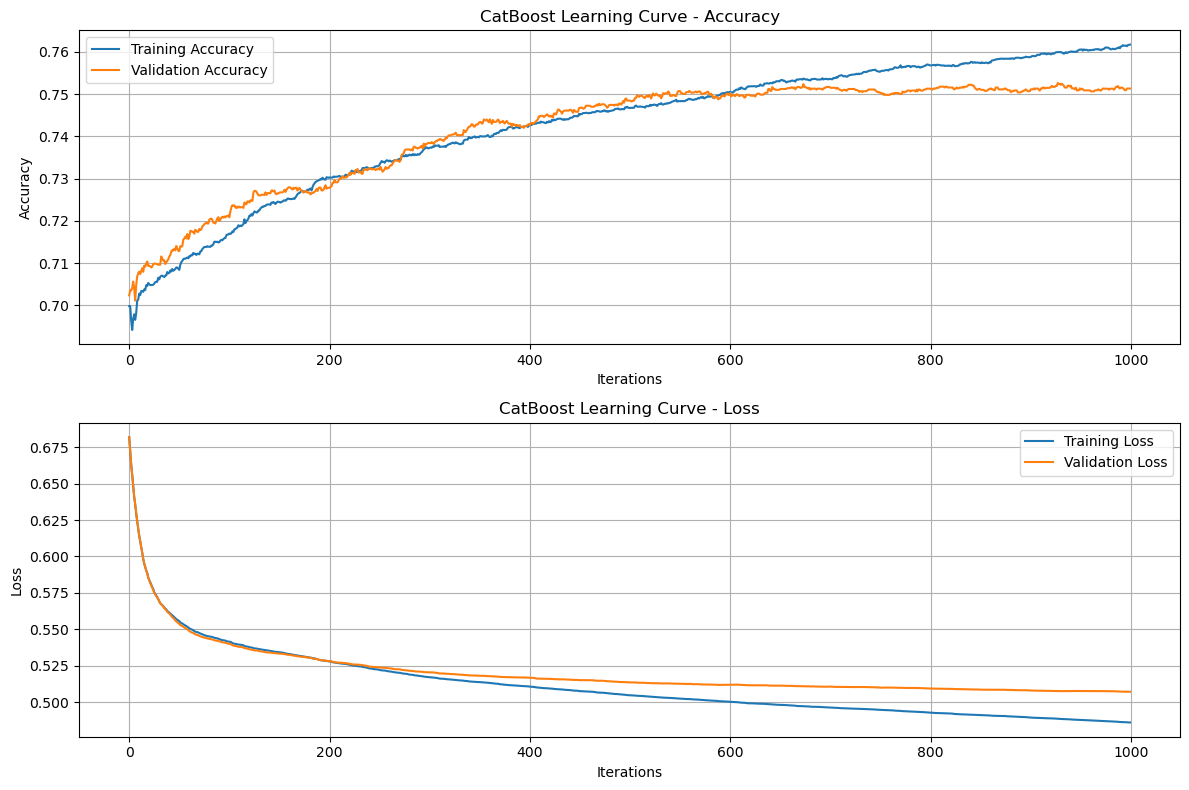

Model Accuracy: 0.7434952298352124
0:	learn: 0.6577004	total: 18.7ms	remaining: 18.7s
1:	learn: 0.6659813	total: 38.5ms	remaining: 19.2s
2:	learn: 0.6650015	total: 57.6ms	remaining: 19.1s
3:	learn: 0.6836362	total: 75ms	remaining: 18.7s
4:	learn: 0.6850703	total: 93.6ms	remaining: 18.6s
5:	learn: 0.6891947	total: 111ms	remaining: 18.4s
6:	learn: 0.6927123	total: 130ms	remaining: 18.4s
7:	learn: 0.6963034	total: 149ms	remaining: 18.5s
8:	learn: 0.6994248	total: 166ms	remaining: 18.3s
9:	learn: 0.7009388	total: 184ms	remaining: 18.3s
10:	learn: 0.7006874	total: 201ms	remaining: 18s
11:	learn: 0.7013345	total: 218ms	remaining: 18s
12:	learn: 0.7008454	total: 235ms	remaining: 17.9s
13:	learn: 0.7002347	total: 253ms	remaining: 17.8s
14:	learn: 0.7007517	total: 271ms	remaining: 17.8s
15:	learn: 0.7006546	total: 289ms	remaining: 17.8s
16:	learn: 0.7000990	total: 307ms	remaining: 17.7s
17:	learn: 0.7002399	total: 323ms	remaining: 17.6s
18:	learn: 0.7009892	total: 341ms	remaining: 17.6s
19:	lea

168:	learn: 0.7224042	total: 3.37s	remaining: 16.6s
169:	learn: 0.7224915	total: 3.39s	remaining: 16.6s
170:	learn: 0.7232551	total: 3.41s	remaining: 16.5s
171:	learn: 0.7232115	total: 3.43s	remaining: 16.5s
172:	learn: 0.7231565	total: 3.45s	remaining: 16.5s
173:	learn: 0.7231014	total: 3.47s	remaining: 16.5s
174:	learn: 0.7231014	total: 3.49s	remaining: 16.5s
175:	learn: 0.7234110	total: 3.51s	remaining: 16.4s
176:	learn: 0.7237757	total: 3.53s	remaining: 16.4s
177:	learn: 0.7237871	total: 3.55s	remaining: 16.4s
178:	learn: 0.7238858	total: 3.57s	remaining: 16.4s
179:	learn: 0.7243377	total: 3.59s	remaining: 16.3s
180:	learn: 0.7244936	total: 3.61s	remaining: 16.3s
181:	learn: 0.7245601	total: 3.63s	remaining: 16.3s
182:	learn: 0.7246702	total: 3.65s	remaining: 16.3s
183:	learn: 0.7243377	total: 3.67s	remaining: 16.3s
184:	learn: 0.7246567	total: 3.69s	remaining: 16.3s
185:	learn: 0.7249226	total: 3.71s	remaining: 16.2s
186:	learn: 0.7257392	total: 3.73s	remaining: 16.2s
187:	learn: 

330:	learn: 0.7395312	total: 6.8s	remaining: 13.7s
331:	learn: 0.7395955	total: 6.82s	remaining: 13.7s
332:	learn: 0.7399602	total: 6.84s	remaining: 13.7s
333:	learn: 0.7403478	total: 6.86s	remaining: 13.7s
334:	learn: 0.7402491	total: 6.88s	remaining: 13.7s
335:	learn: 0.7407789	total: 6.91s	remaining: 13.6s
336:	learn: 0.7406459	total: 6.93s	remaining: 13.6s
337:	learn: 0.7407217	total: 6.95s	remaining: 13.6s
338:	learn: 0.7408340	total: 6.97s	remaining: 13.6s
339:	learn: 0.7411436	total: 6.99s	remaining: 13.6s
340:	learn: 0.7413317	total: 7.01s	remaining: 13.5s
341:	learn: 0.7411550	total: 7.03s	remaining: 13.5s
342:	learn: 0.7412330	total: 7.05s	remaining: 13.5s
343:	learn: 0.7412101	total: 7.07s	remaining: 13.5s
344:	learn: 0.7413202	total: 7.09s	remaining: 13.5s
345:	learn: 0.7411000	total: 7.11s	remaining: 13.4s
346:	learn: 0.7413431	total: 7.13s	remaining: 13.4s
347:	learn: 0.7413774	total: 7.15s	remaining: 13.4s
348:	learn: 0.7413774	total: 7.17s	remaining: 13.4s
349:	learn: 0

497:	learn: 0.7474003	total: 10.7s	remaining: 10.8s
498:	learn: 0.7478086	total: 10.7s	remaining: 10.8s
499:	learn: 0.7480309	total: 10.8s	remaining: 10.8s
500:	learn: 0.7480195	total: 10.8s	remaining: 10.7s
501:	learn: 0.7480309	total: 10.8s	remaining: 10.7s
502:	learn: 0.7479966	total: 10.8s	remaining: 10.7s
503:	learn: 0.7479416	total: 10.8s	remaining: 10.7s
504:	learn: 0.7478636	total: 10.9s	remaining: 10.7s
505:	learn: 0.7479852	total: 10.9s	remaining: 10.6s
506:	learn: 0.7479416	total: 10.9s	remaining: 10.6s
507:	learn: 0.7479416	total: 10.9s	remaining: 10.6s
508:	learn: 0.7479416	total: 11s	remaining: 10.6s
509:	learn: 0.7483749	total: 11s	remaining: 10.5s
510:	learn: 0.7481868	total: 11s	remaining: 10.5s
511:	learn: 0.7485286	total: 11s	remaining: 10.5s
512:	learn: 0.7485951	total: 11s	remaining: 10.5s
513:	learn: 0.7487167	total: 11.1s	remaining: 10.5s
514:	learn: 0.7487167	total: 11.1s	remaining: 10.4s
515:	learn: 0.7487052	total: 11.1s	remaining: 10.4s
516:	learn: 0.7486387	

661:	learn: 0.7521660	total: 14.2s	remaining: 7.25s
662:	learn: 0.7523427	total: 14.2s	remaining: 7.23s
663:	learn: 0.7523427	total: 14.2s	remaining: 7.21s
664:	learn: 0.7523977	total: 14.3s	remaining: 7.18s
665:	learn: 0.7525422	total: 14.3s	remaining: 7.16s
666:	learn: 0.7524871	total: 14.3s	remaining: 7.14s
667:	learn: 0.7527624	total: 14.3s	remaining: 7.12s
668:	learn: 0.7525743	total: 14.3s	remaining: 7.1s
669:	learn: 0.7525743	total: 14.4s	remaining: 7.07s
670:	learn: 0.7525307	total: 14.4s	remaining: 7.05s
671:	learn: 0.7526523	total: 14.4s	remaining: 7.03s
672:	learn: 0.7526637	total: 14.4s	remaining: 7.01s
673:	learn: 0.7526637	total: 14.4s	remaining: 6.99s
674:	learn: 0.7527416	total: 14.5s	remaining: 6.97s
675:	learn: 0.7528518	total: 14.5s	remaining: 6.95s
676:	learn: 0.7529090	total: 14.5s	remaining: 6.92s
677:	learn: 0.7525993	total: 14.5s	remaining: 6.9s
678:	learn: 0.7527760	total: 14.6s	remaining: 6.88s
679:	learn: 0.7527209	total: 14.6s	remaining: 6.86s
680:	learn: 0.

827:	learn: 0.7574295	total: 17.7s	remaining: 3.67s
828:	learn: 0.7575510	total: 17.7s	remaining: 3.65s
829:	learn: 0.7575510	total: 17.7s	remaining: 3.63s
830:	learn: 0.7574845	total: 17.7s	remaining: 3.6s
831:	learn: 0.7574845	total: 17.7s	remaining: 3.58s
832:	learn: 0.7574845	total: 17.8s	remaining: 3.56s
833:	learn: 0.7575074	total: 17.8s	remaining: 3.54s
834:	learn: 0.7575074	total: 17.8s	remaining: 3.52s
835:	learn: 0.7574409	total: 17.8s	remaining: 3.5s
836:	learn: 0.7573630	total: 17.9s	remaining: 3.48s
837:	learn: 0.7573630	total: 17.9s	remaining: 3.45s
838:	learn: 0.7574409	total: 17.9s	remaining: 3.43s
839:	learn: 0.7574295	total: 17.9s	remaining: 3.41s
840:	learn: 0.7574960	total: 17.9s	remaining: 3.39s
841:	learn: 0.7574409	total: 18s	remaining: 3.37s
842:	learn: 0.7574409	total: 18s	remaining: 3.35s
843:	learn: 0.7574524	total: 18s	remaining: 3.33s
844:	learn: 0.7573308	total: 18s	remaining: 3.31s
845:	learn: 0.7573308	total: 18s	remaining: 3.28s
846:	learn: 0.7574960	to

995:	learn: 0.7605121	total: 21.2s	remaining: 85ms
996:	learn: 0.7606336	total: 21.2s	remaining: 63.7ms
997:	learn: 0.7606887	total: 21.2s	remaining: 42.5ms
998:	learn: 0.7608882	total: 21.2s	remaining: 21.2ms
999:	learn: 0.7607666	total: 21.2s	remaining: 0us
0:	learn: 0.6605979	total: 19ms	remaining: 19s
1:	learn: 0.6657446	total: 39.3ms	remaining: 19.6s
2:	learn: 0.6864188	total: 59.1ms	remaining: 19.7s
3:	learn: 0.6917748	total: 76.6ms	remaining: 19.1s
4:	learn: 0.6962975	total: 94.6ms	remaining: 18.8s
5:	learn: 0.6973997	total: 114ms	remaining: 18.8s
6:	learn: 0.6982207	total: 133ms	remaining: 18.9s
7:	learn: 0.6978745	total: 152ms	remaining: 18.8s
8:	learn: 0.6994652	total: 171ms	remaining: 18.8s
9:	learn: 0.6990425	total: 188ms	remaining: 18.7s
10:	learn: 0.6998026	total: 207ms	remaining: 18.6s
11:	learn: 0.6998757	total: 225ms	remaining: 18.5s
12:	learn: 0.6993045	total: 244ms	remaining: 18.5s
13:	learn: 0.6994490	total: 262ms	remaining: 18.5s
14:	learn: 0.6996991	total: 284ms	r

160:	learn: 0.7194073	total: 3.5s	remaining: 18.2s
161:	learn: 0.7196068	total: 3.52s	remaining: 18.2s
162:	learn: 0.7195288	total: 3.55s	remaining: 18.2s
163:	learn: 0.7194967	total: 3.58s	remaining: 18.2s
164:	learn: 0.7196733	total: 3.6s	remaining: 18.2s
165:	learn: 0.7196389	total: 3.62s	remaining: 18.2s
166:	learn: 0.7193958	total: 3.65s	remaining: 18.2s
167:	learn: 0.7193843	total: 3.67s	remaining: 18.2s
168:	learn: 0.7195059	total: 3.7s	remaining: 18.2s
169:	learn: 0.7196389	total: 3.72s	remaining: 18.2s
170:	learn: 0.7194165	total: 3.75s	remaining: 18.2s
171:	learn: 0.7195495	total: 3.77s	remaining: 18.1s
172:	learn: 0.7196711	total: 3.79s	remaining: 18.1s
173:	learn: 0.7198706	total: 3.81s	remaining: 18.1s
174:	learn: 0.7204141	total: 3.84s	remaining: 18.1s
175:	learn: 0.7202146	total: 3.87s	remaining: 18.1s
176:	learn: 0.7204462	total: 3.89s	remaining: 18.1s
177:	learn: 0.7206229	total: 3.91s	remaining: 18.1s
178:	learn: 0.7206343	total: 3.94s	remaining: 18.1s
179:	learn: 0.7

323:	learn: 0.7348666	total: 7.21s	remaining: 15.1s
324:	learn: 0.7348780	total: 7.24s	remaining: 15s
325:	learn: 0.7349882	total: 7.26s	remaining: 15s
326:	learn: 0.7349882	total: 7.28s	remaining: 15s
327:	learn: 0.7348344	total: 7.3s	remaining: 15s
328:	learn: 0.7350890	total: 7.32s	remaining: 14.9s
329:	learn: 0.7350111	total: 7.35s	remaining: 14.9s
330:	learn: 0.7349675	total: 7.37s	remaining: 14.9s
331:	learn: 0.7356854	total: 7.39s	remaining: 14.9s
332:	learn: 0.7355867	total: 7.41s	remaining: 14.8s
333:	learn: 0.7356532	total: 7.43s	remaining: 14.8s
334:	learn: 0.7364376	total: 7.45s	remaining: 14.8s
335:	learn: 0.7357197	total: 7.47s	remaining: 14.8s
336:	learn: 0.7357197	total: 7.49s	remaining: 14.7s
337:	learn: 0.7359193	total: 7.51s	remaining: 14.7s
338:	learn: 0.7361967	total: 7.53s	remaining: 14.7s
339:	learn: 0.7359972	total: 7.55s	remaining: 14.7s
340:	learn: 0.7360523	total: 7.58s	remaining: 14.6s
341:	learn: 0.7363068	total: 7.6s	remaining: 14.6s
342:	learn: 0.7363848	

485:	learn: 0.7431301	total: 10.7s	remaining: 11.3s
486:	learn: 0.7430865	total: 10.7s	remaining: 11.2s
487:	learn: 0.7429099	total: 10.7s	remaining: 11.2s
488:	learn: 0.7429099	total: 10.7s	remaining: 11.2s
489:	learn: 0.7426897	total: 10.7s	remaining: 11.2s
490:	learn: 0.7427540	total: 10.8s	remaining: 11.2s
491:	learn: 0.7429077	total: 10.8s	remaining: 11.1s
492:	learn: 0.7429077	total: 10.8s	remaining: 11.1s
493:	learn: 0.7429971	total: 10.8s	remaining: 11.1s
494:	learn: 0.7430315	total: 10.8s	remaining: 11.1s
495:	learn: 0.7428985	total: 10.9s	remaining: 11s
496:	learn: 0.7430636	total: 10.9s	remaining: 11s
497:	learn: 0.7430636	total: 10.9s	remaining: 11s
498:	learn: 0.7432173	total: 10.9s	remaining: 11s
499:	learn: 0.7431852	total: 11s	remaining: 11s
500:	learn: 0.7432402	total: 11s	remaining: 10.9s
501:	learn: 0.7431852	total: 11s	remaining: 10.9s
502:	learn: 0.7432953	total: 11s	remaining: 10.9s
503:	learn: 0.7433182	total: 11s	remaining: 10.9s
504:	learn: 0.7435820	total: 11.

650:	learn: 0.7504057	total: 14.1s	remaining: 7.58s
651:	learn: 0.7503943	total: 14.2s	remaining: 7.56s
652:	learn: 0.7506924	total: 14.2s	remaining: 7.54s
653:	learn: 0.7504951	total: 14.2s	remaining: 7.52s
654:	learn: 0.7504286	total: 14.2s	remaining: 7.5s
655:	learn: 0.7505387	total: 14.3s	remaining: 7.47s
656:	learn: 0.7507933	total: 14.3s	remaining: 7.45s
657:	learn: 0.7506167	total: 14.3s	remaining: 7.43s
658:	learn: 0.7504401	total: 14.3s	remaining: 7.41s
659:	learn: 0.7507153	total: 14.3s	remaining: 7.38s
660:	learn: 0.7506603	total: 14.4s	remaining: 7.36s
661:	learn: 0.7506603	total: 14.4s	remaining: 7.34s
662:	learn: 0.7508047	total: 14.4s	remaining: 7.32s
663:	learn: 0.7509263	total: 14.4s	remaining: 7.3s
664:	learn: 0.7511465	total: 14.4s	remaining: 7.28s
665:	learn: 0.7514676	total: 14.5s	remaining: 7.25s
666:	learn: 0.7515570	total: 14.5s	remaining: 7.23s
667:	learn: 0.7515456	total: 14.5s	remaining: 7.21s
668:	learn: 0.7512588	total: 14.5s	remaining: 7.19s
669:	learn: 0.

816:	learn: 0.7555734	total: 17.8s	remaining: 3.98s
817:	learn: 0.7555848	total: 17.8s	remaining: 3.96s
818:	learn: 0.7555848	total: 17.8s	remaining: 3.94s
819:	learn: 0.7555848	total: 17.8s	remaining: 3.92s
820:	learn: 0.7555848	total: 17.9s	remaining: 3.9s
821:	learn: 0.7558165	total: 17.9s	remaining: 3.87s
822:	learn: 0.7558601	total: 17.9s	remaining: 3.85s
823:	learn: 0.7558601	total: 17.9s	remaining: 3.83s
824:	learn: 0.7560045	total: 17.9s	remaining: 3.81s
825:	learn: 0.7560481	total: 18s	remaining: 3.79s
826:	learn: 0.7559931	total: 18s	remaining: 3.76s
827:	learn: 0.7559380	total: 18s	remaining: 3.74s
828:	learn: 0.7559380	total: 18s	remaining: 3.72s
829:	learn: 0.7561146	total: 18.1s	remaining: 3.7s
830:	learn: 0.7562248	total: 18.1s	remaining: 3.68s
831:	learn: 0.7561146	total: 18.1s	remaining: 3.65s
832:	learn: 0.7562913	total: 18.1s	remaining: 3.63s
833:	learn: 0.7562362	total: 18.2s	remaining: 3.61s
834:	learn: 0.7563463	total: 18.2s	remaining: 3.59s
835:	learn: 0.7562362	

978:	learn: 0.7585917	total: 21.7s	remaining: 465ms
979:	learn: 0.7586467	total: 21.7s	remaining: 443ms
980:	learn: 0.7585917	total: 21.7s	remaining: 421ms
981:	learn: 0.7587798	total: 21.8s	remaining: 399ms
982:	learn: 0.7587912	total: 21.8s	remaining: 377ms
983:	learn: 0.7588463	total: 21.8s	remaining: 354ms
984:	learn: 0.7589678	total: 21.8s	remaining: 332ms
985:	learn: 0.7586260	total: 21.8s	remaining: 310ms
986:	learn: 0.7587361	total: 21.9s	remaining: 288ms
987:	learn: 0.7589907	total: 21.9s	remaining: 266ms
988:	learn: 0.7591559	total: 21.9s	remaining: 244ms
989:	learn: 0.7591559	total: 21.9s	remaining: 221ms
990:	learn: 0.7590343	total: 21.9s	remaining: 199ms
991:	learn: 0.7588027	total: 22s	remaining: 177ms
992:	learn: 0.7588234	total: 22s	remaining: 155ms
993:	learn: 0.7589678	total: 22s	remaining: 133ms
994:	learn: 0.7587912	total: 22s	remaining: 111ms
995:	learn: 0.7589013	total: 22s	remaining: 88.6ms
996:	learn: 0.7590894	total: 22.1s	remaining: 66.4ms
997:	learn: 0.758944

146:	learn: 0.7224101	total: 3.08s	remaining: 17.8s
147:	learn: 0.7227977	total: 3.1s	remaining: 17.8s
148:	learn: 0.7229422	total: 3.12s	remaining: 17.8s
149:	learn: 0.7229765	total: 3.14s	remaining: 17.8s
150:	learn: 0.7230866	total: 3.16s	remaining: 17.8s
151:	learn: 0.7229193	total: 3.18s	remaining: 17.7s
152:	learn: 0.7227977	total: 3.2s	remaining: 17.7s
153:	learn: 0.7231716	total: 3.22s	remaining: 17.7s
154:	learn: 0.7233024	total: 3.24s	remaining: 17.7s
155:	learn: 0.7235570	total: 3.26s	remaining: 17.7s
156:	learn: 0.7237107	total: 3.29s	remaining: 17.6s
157:	learn: 0.7238208	total: 3.31s	remaining: 17.6s
158:	learn: 0.7240203	total: 3.33s	remaining: 17.6s
159:	learn: 0.7242313	total: 3.35s	remaining: 17.6s
160:	learn: 0.7239446	total: 3.37s	remaining: 17.5s
161:	learn: 0.7243300	total: 3.39s	remaining: 17.5s
162:	learn: 0.7243736	total: 3.41s	remaining: 17.5s
163:	learn: 0.7242520	total: 3.43s	remaining: 17.5s
164:	learn: 0.7241190	total: 3.45s	remaining: 17.5s
165:	learn: 0.

310:	learn: 0.7351515	total: 6.75s	remaining: 15s
311:	learn: 0.7351400	total: 6.78s	remaining: 14.9s
312:	learn: 0.7351400	total: 6.8s	remaining: 14.9s
313:	learn: 0.7351836	total: 6.82s	remaining: 14.9s
314:	learn: 0.7352502	total: 6.85s	remaining: 14.9s
315:	learn: 0.7352502	total: 6.87s	remaining: 14.9s
316:	learn: 0.7352616	total: 6.89s	remaining: 14.8s
317:	learn: 0.7353832	total: 6.91s	remaining: 14.8s
318:	learn: 0.7353717	total: 6.93s	remaining: 14.8s
319:	learn: 0.7353717	total: 6.95s	remaining: 14.8s
320:	learn: 0.7353717	total: 6.97s	remaining: 14.7s
321:	learn: 0.7351951	total: 6.99s	remaining: 14.7s
322:	learn: 0.7352387	total: 7.01s	remaining: 14.7s
323:	learn: 0.7351929	total: 7.04s	remaining: 14.7s
324:	learn: 0.7352387	total: 7.06s	remaining: 14.7s
325:	learn: 0.7352616	total: 7.08s	remaining: 14.6s
326:	learn: 0.7352502	total: 7.1s	remaining: 14.6s
327:	learn: 0.7351836	total: 7.12s	remaining: 14.6s
328:	learn: 0.7351951	total: 7.14s	remaining: 14.6s
329:	learn: 0.73

470:	learn: 0.7431653	total: 10.2s	remaining: 11.5s
471:	learn: 0.7431102	total: 10.3s	remaining: 11.5s
472:	learn: 0.7430001	total: 10.3s	remaining: 11.4s
473:	learn: 0.7434313	total: 10.3s	remaining: 11.4s
474:	learn: 0.7433763	total: 10.3s	remaining: 11.4s
475:	learn: 0.7433534	total: 10.3s	remaining: 11.4s
476:	learn: 0.7433212	total: 10.4s	remaining: 11.4s
477:	learn: 0.7431217	total: 10.4s	remaining: 11.3s
478:	learn: 0.7431217	total: 10.4s	remaining: 11.3s
479:	learn: 0.7434978	total: 10.4s	remaining: 11.3s
480:	learn: 0.7434199	total: 10.4s	remaining: 11.3s
481:	learn: 0.7434199	total: 10.5s	remaining: 11.3s
482:	learn: 0.7437295	total: 10.5s	remaining: 11.2s
483:	learn: 0.7435529	total: 10.5s	remaining: 11.2s
484:	learn: 0.7434978	total: 10.5s	remaining: 11.2s
485:	learn: 0.7436973	total: 10.6s	remaining: 11.2s
486:	learn: 0.7439176	total: 10.6s	remaining: 11.1s
487:	learn: 0.7439176	total: 10.6s	remaining: 11.1s
488:	learn: 0.7438510	total: 10.6s	remaining: 11.1s
489:	learn: 

637:	learn: 0.7514821	total: 14.2s	remaining: 8.08s
638:	learn: 0.7514821	total: 14.3s	remaining: 8.06s
639:	learn: 0.7514821	total: 14.3s	remaining: 8.04s
640:	learn: 0.7514156	total: 14.3s	remaining: 8.02s
641:	learn: 0.7513605	total: 14.3s	remaining: 8s
642:	learn: 0.7512275	total: 14.4s	remaining: 7.98s
643:	learn: 0.7514156	total: 14.4s	remaining: 7.96s
644:	learn: 0.7514156	total: 14.4s	remaining: 7.93s
645:	learn: 0.7514156	total: 14.4s	remaining: 7.91s
646:	learn: 0.7514156	total: 14.5s	remaining: 7.89s
647:	learn: 0.7514592	total: 14.5s	remaining: 7.87s
648:	learn: 0.7515028	total: 14.5s	remaining: 7.85s
649:	learn: 0.7515693	total: 14.5s	remaining: 7.83s
650:	learn: 0.7516243	total: 14.6s	remaining: 7.81s
651:	learn: 0.7519890	total: 14.6s	remaining: 7.79s
652:	learn: 0.7519890	total: 14.6s	remaining: 7.77s
653:	learn: 0.7519775	total: 14.6s	remaining: 7.75s
654:	learn: 0.7520441	total: 14.7s	remaining: 7.73s
655:	learn: 0.7520991	total: 14.7s	remaining: 7.71s
656:	learn: 0.7

796:	learn: 0.7551862	total: 17.7s	remaining: 4.51s
797:	learn: 0.7551311	total: 17.7s	remaining: 4.49s
798:	learn: 0.7551311	total: 17.8s	remaining: 4.47s
799:	learn: 0.7551862	total: 17.8s	remaining: 4.45s
800:	learn: 0.7554843	total: 17.8s	remaining: 4.42s
801:	learn: 0.7555394	total: 17.8s	remaining: 4.4s
802:	learn: 0.7554729	total: 17.8s	remaining: 4.38s
803:	learn: 0.7557940	total: 17.9s	remaining: 4.36s
804:	learn: 0.7559362	total: 17.9s	remaining: 4.33s
805:	learn: 0.7559820	total: 17.9s	remaining: 4.31s
806:	learn: 0.7558376	total: 17.9s	remaining: 4.29s
807:	learn: 0.7559477	total: 18s	remaining: 4.27s
808:	learn: 0.7559913	total: 18s	remaining: 4.24s
809:	learn: 0.7559591	total: 18s	remaining: 4.22s
810:	learn: 0.7561908	total: 18s	remaining: 4.2s
811:	learn: 0.7561357	total: 18s	remaining: 4.18s
812:	learn: 0.7558376	total: 18.1s	remaining: 4.16s
813:	learn: 0.7558490	total: 18.1s	remaining: 4.13s
814:	learn: 0.7558490	total: 18.1s	remaining: 4.11s
815:	learn: 0.7560692	to

962:	learn: 0.7588722	total: 21.4s	remaining: 822ms
963:	learn: 0.7588607	total: 21.4s	remaining: 800ms
964:	learn: 0.7588607	total: 21.4s	remaining: 778ms
965:	learn: 0.7589158	total: 21.5s	remaining: 755ms
966:	learn: 0.7589158	total: 21.5s	remaining: 733ms
967:	learn: 0.7589158	total: 21.5s	remaining: 711ms
968:	learn: 0.7589708	total: 21.5s	remaining: 689ms
969:	learn: 0.7591703	total: 21.5s	remaining: 666ms
970:	learn: 0.7591038	total: 21.6s	remaining: 644ms
971:	learn: 0.7591038	total: 21.6s	remaining: 622ms
972:	learn: 0.7590602	total: 21.6s	remaining: 600ms
973:	learn: 0.7590052	total: 21.6s	remaining: 577ms
974:	learn: 0.7591267	total: 21.7s	remaining: 555ms
975:	learn: 0.7592919	total: 21.7s	remaining: 533ms
976:	learn: 0.7593355	total: 21.7s	remaining: 511ms
977:	learn: 0.7594571	total: 21.7s	remaining: 489ms
978:	learn: 0.7594571	total: 21.7s	remaining: 466ms
979:	learn: 0.7594685	total: 21.8s	remaining: 444ms
980:	learn: 0.7592919	total: 21.8s	remaining: 422ms
981:	learn: 

124:	learn: 0.7179899	total: 2.69s	remaining: 18.8s
125:	learn: 0.7181780	total: 2.71s	remaining: 18.8s
126:	learn: 0.7180679	total: 2.73s	remaining: 18.8s
127:	learn: 0.7179142	total: 2.75s	remaining: 18.7s
128:	learn: 0.7185955	total: 2.77s	remaining: 18.7s
129:	learn: 0.7191919	total: 2.79s	remaining: 18.7s
130:	learn: 0.7192240	total: 2.81s	remaining: 18.7s
131:	learn: 0.7195336	total: 2.84s	remaining: 18.7s
132:	learn: 0.7192011	total: 2.86s	remaining: 18.6s
133:	learn: 0.7192676	total: 2.88s	remaining: 18.6s
134:	learn: 0.7192676	total: 2.9s	remaining: 18.6s
135:	learn: 0.7194328	total: 2.92s	remaining: 18.6s
136:	learn: 0.7195865	total: 2.94s	remaining: 18.5s
137:	learn: 0.7197516	total: 2.96s	remaining: 18.5s
138:	learn: 0.7193870	total: 2.99s	remaining: 18.5s
139:	learn: 0.7196622	total: 3.01s	remaining: 18.5s
140:	learn: 0.7198274	total: 3.03s	remaining: 18.5s
141:	learn: 0.7199855	total: 3.05s	remaining: 18.4s
142:	learn: 0.7198847	total: 3.07s	remaining: 18.4s
143:	learn: 0

286:	learn: 0.7340601	total: 6.44s	remaining: 16s
287:	learn: 0.7340601	total: 6.47s	remaining: 16s
288:	learn: 0.7339821	total: 6.49s	remaining: 16s
289:	learn: 0.7339385	total: 6.52s	remaining: 16s
290:	learn: 0.7341702	total: 6.55s	remaining: 16s
291:	learn: 0.7342917	total: 6.57s	remaining: 15.9s
292:	learn: 0.7341151	total: 6.6s	remaining: 15.9s
293:	learn: 0.7339935	total: 6.62s	remaining: 15.9s
294:	learn: 0.7339935	total: 6.65s	remaining: 15.9s
295:	learn: 0.7340257	total: 6.67s	remaining: 15.9s
296:	learn: 0.7340922	total: 6.7s	remaining: 15.9s
297:	learn: 0.7343239	total: 6.72s	remaining: 15.8s
298:	learn: 0.7343239	total: 6.75s	remaining: 15.8s
299:	learn: 0.7342895	total: 6.77s	remaining: 15.8s
300:	learn: 0.7343560	total: 6.79s	remaining: 15.8s
301:	learn: 0.7343010	total: 6.82s	remaining: 15.8s
302:	learn: 0.7342459	total: 6.84s	remaining: 15.7s
303:	learn: 0.7348079	total: 6.87s	remaining: 15.7s
304:	learn: 0.7347322	total: 6.89s	remaining: 15.7s
305:	learn: 0.7347643	to

450:	learn: 0.7435370	total: 10.4s	remaining: 12.6s
451:	learn: 0.7438123	total: 10.4s	remaining: 12.6s
452:	learn: 0.7437022	total: 10.4s	remaining: 12.6s
453:	learn: 0.7436035	total: 10.4s	remaining: 12.5s
454:	learn: 0.7436700	total: 10.5s	remaining: 12.5s
455:	learn: 0.7437251	total: 10.5s	remaining: 12.5s
456:	learn: 0.7438788	total: 10.5s	remaining: 12.5s
457:	learn: 0.7439682	total: 10.5s	remaining: 12.4s
458:	learn: 0.7440554	total: 10.5s	remaining: 12.4s
459:	learn: 0.7438673	total: 10.6s	remaining: 12.4s
460:	learn: 0.7440003	total: 10.6s	remaining: 12.4s
461:	learn: 0.7441219	total: 10.6s	remaining: 12.4s
462:	learn: 0.7440554	total: 10.6s	remaining: 12.3s
463:	learn: 0.7442435	total: 10.6s	remaining: 12.3s
464:	learn: 0.7441655	total: 10.7s	remaining: 12.3s
465:	learn: 0.7442985	total: 10.7s	remaining: 12.3s
466:	learn: 0.7442985	total: 10.7s	remaining: 12.2s
467:	learn: 0.7444086	total: 10.7s	remaining: 12.2s
468:	learn: 0.7442320	total: 10.8s	remaining: 12.2s
469:	learn: 

618:	learn: 0.7500669	total: 14s	remaining: 8.63s
619:	learn: 0.7500669	total: 14s	remaining: 8.61s
620:	learn: 0.7501885	total: 14.1s	remaining: 8.59s
621:	learn: 0.7501220	total: 14.1s	remaining: 8.56s
622:	learn: 0.7500004	total: 14.1s	remaining: 8.54s
623:	learn: 0.7500669	total: 14.1s	remaining: 8.52s
624:	learn: 0.7502550	total: 14.2s	remaining: 8.49s
625:	learn: 0.7502550	total: 14.2s	remaining: 8.47s
626:	learn: 0.7501220	total: 14.2s	remaining: 8.45s
627:	learn: 0.7501220	total: 14.2s	remaining: 8.42s
628:	learn: 0.7501885	total: 14.2s	remaining: 8.4s
629:	learn: 0.7501105	total: 14.3s	remaining: 8.38s
630:	learn: 0.7501885	total: 14.3s	remaining: 8.36s
631:	learn: 0.7502986	total: 14.3s	remaining: 8.33s
632:	learn: 0.7502321	total: 14.3s	remaining: 8.31s
633:	learn: 0.7502871	total: 14.4s	remaining: 8.29s
634:	learn: 0.7504087	total: 14.4s	remaining: 8.26s
635:	learn: 0.7503973	total: 14.4s	remaining: 8.24s
636:	learn: 0.7501977	total: 14.4s	remaining: 8.22s
637:	learn: 0.750

784:	learn: 0.7547162	total: 17.7s	remaining: 4.86s
785:	learn: 0.7546382	total: 17.8s	remaining: 4.83s
786:	learn: 0.7546497	total: 17.8s	remaining: 4.81s
787:	learn: 0.7546497	total: 17.8s	remaining: 4.79s
788:	learn: 0.7549043	total: 17.8s	remaining: 4.76s
789:	learn: 0.7549708	total: 17.8s	remaining: 4.74s
790:	learn: 0.7550144	total: 17.9s	remaining: 4.72s
791:	learn: 0.7550144	total: 17.9s	remaining: 4.7s
792:	learn: 0.7550144	total: 17.9s	remaining: 4.67s
793:	learn: 0.7552139	total: 17.9s	remaining: 4.65s
794:	learn: 0.7552689	total: 17.9s	remaining: 4.63s
795:	learn: 0.7552575	total: 18s	remaining: 4.6s
796:	learn: 0.7554341	total: 18s	remaining: 4.58s
797:	learn: 0.7553011	total: 18s	remaining: 4.56s
798:	learn: 0.7553011	total: 18s	remaining: 4.54s
799:	learn: 0.7551795	total: 18.1s	remaining: 4.51s
800:	learn: 0.7551910	total: 18.1s	remaining: 4.49s
801:	learn: 0.7552024	total: 18.1s	remaining: 4.47s
802:	learn: 0.7552896	total: 18.1s	remaining: 4.45s
803:	learn: 0.7555442	

947:	learn: 0.7601428	total: 21.4s	remaining: 1.18s
948:	learn: 0.7602093	total: 21.5s	remaining: 1.15s
949:	learn: 0.7602093	total: 21.5s	remaining: 1.13s
950:	learn: 0.7602758	total: 21.5s	remaining: 1.11s
951:	learn: 0.7602644	total: 21.5s	remaining: 1.08s
952:	learn: 0.7601543	total: 21.6s	remaining: 1.06s
953:	learn: 0.7602758	total: 21.6s	remaining: 1.04s
954:	learn: 0.7601107	total: 21.6s	remaining: 1.02s
955:	learn: 0.7600327	total: 21.6s	remaining: 996ms
956:	learn: 0.7600327	total: 21.7s	remaining: 974ms
957:	learn: 0.7600992	total: 21.7s	remaining: 952ms
958:	learn: 0.7600327	total: 21.8s	remaining: 930ms
959:	learn: 0.7599662	total: 21.8s	remaining: 907ms
960:	learn: 0.7600213	total: 21.8s	remaining: 885ms
961:	learn: 0.7600763	total: 21.8s	remaining: 862ms
962:	learn: 0.7601314	total: 21.8s	remaining: 839ms
963:	learn: 0.7601314	total: 21.9s	remaining: 817ms
964:	learn: 0.7601979	total: 21.9s	remaining: 794ms
965:	learn: 0.7603860	total: 21.9s	remaining: 772ms
966:	learn: 

114:	learn: 0.7156071	total: 2.62s	remaining: 20.1s
115:	learn: 0.7158366	total: 2.64s	remaining: 20.1s
116:	learn: 0.7161026	total: 2.66s	remaining: 20.1s
117:	learn: 0.7162471	total: 2.68s	remaining: 20s
118:	learn: 0.7161806	total: 2.7s	remaining: 20s
119:	learn: 0.7166210	total: 2.72s	remaining: 20s
120:	learn: 0.7168848	total: 2.75s	remaining: 19.9s
121:	learn: 0.7170064	total: 2.77s	remaining: 19.9s
122:	learn: 0.7171165	total: 2.79s	remaining: 19.9s
123:	learn: 0.7169170	total: 2.81s	remaining: 19.9s
124:	learn: 0.7170799	total: 2.83s	remaining: 19.8s
125:	learn: 0.7169812	total: 2.85s	remaining: 19.8s
126:	learn: 0.7169055	total: 2.87s	remaining: 19.7s
127:	learn: 0.7169055	total: 2.89s	remaining: 19.7s
128:	learn: 0.7169720	total: 2.92s	remaining: 19.7s
129:	learn: 0.7170271	total: 2.94s	remaining: 19.7s
130:	learn: 0.7171050	total: 2.96s	remaining: 19.6s
131:	learn: 0.7174032	total: 2.98s	remaining: 19.6s
132:	learn: 0.7176578	total: 3s	remaining: 19.6s
133:	learn: 0.7180568	

273:	learn: 0.7335509	total: 6.08s	remaining: 16.1s
274:	learn: 0.7334179	total: 6.1s	remaining: 16.1s
275:	learn: 0.7339821	total: 6.12s	remaining: 16.1s
276:	learn: 0.7341037	total: 6.14s	remaining: 16s
277:	learn: 0.7341587	total: 6.17s	remaining: 16s
278:	learn: 0.7342459	total: 6.19s	remaining: 16s
279:	learn: 0.7344454	total: 6.21s	remaining: 16s
280:	learn: 0.7347665	total: 6.23s	remaining: 15.9s
281:	learn: 0.7346220	total: 6.25s	remaining: 15.9s
282:	learn: 0.7344776	total: 6.27s	remaining: 15.9s
283:	learn: 0.7344661	total: 6.29s	remaining: 15.9s
284:	learn: 0.7345212	total: 6.32s	remaining: 15.9s
285:	learn: 0.7343882	total: 6.34s	remaining: 15.8s
286:	learn: 0.7343217	total: 6.36s	remaining: 15.8s
287:	learn: 0.7345991	total: 6.38s	remaining: 15.8s
288:	learn: 0.7346978	total: 6.4s	remaining: 15.8s
289:	learn: 0.7346542	total: 6.43s	remaining: 15.7s
290:	learn: 0.7348859	total: 6.45s	remaining: 15.7s
291:	learn: 0.7350074	total: 6.47s	remaining: 15.7s
292:	learn: 0.7348308	

432:	learn: 0.7436334	total: 9.63s	remaining: 12.6s
433:	learn: 0.7440210	total: 9.66s	remaining: 12.6s
434:	learn: 0.7440761	total: 9.68s	remaining: 12.6s
435:	learn: 0.7440554	total: 9.7s	remaining: 12.6s
436:	learn: 0.7438237	total: 9.73s	remaining: 12.5s
437:	learn: 0.7438788	total: 9.75s	remaining: 12.5s
438:	learn: 0.7439889	total: 9.77s	remaining: 12.5s
439:	learn: 0.7439889	total: 9.79s	remaining: 12.5s
440:	learn: 0.7442756	total: 9.82s	remaining: 12.4s
441:	learn: 0.7443421	total: 9.84s	remaining: 12.4s
442:	learn: 0.7443972	total: 9.86s	remaining: 12.4s
443:	learn: 0.7442642	total: 9.88s	remaining: 12.4s
444:	learn: 0.7444522	total: 9.91s	remaining: 12.4s
445:	learn: 0.7444522	total: 9.93s	remaining: 12.3s
446:	learn: 0.7439774	total: 9.95s	remaining: 12.3s
447:	learn: 0.7444086	total: 9.97s	remaining: 12.3s
448:	learn: 0.7444086	total: 9.99s	remaining: 12.3s
449:	learn: 0.7443100	total: 10s	remaining: 12.2s
450:	learn: 0.7443650	total: 10s	remaining: 12.2s
451:	learn: 0.744

599:	learn: 0.7502709	total: 13.4s	remaining: 8.9s
600:	learn: 0.7502823	total: 13.4s	remaining: 8.88s
601:	learn: 0.7505025	total: 13.4s	remaining: 8.86s
602:	learn: 0.7504475	total: 13.4s	remaining: 8.84s
603:	learn: 0.7505576	total: 13.4s	remaining: 8.81s
604:	learn: 0.7505461	total: 13.5s	remaining: 8.79s
605:	learn: 0.7503030	total: 13.5s	remaining: 8.77s
606:	learn: 0.7502480	total: 13.5s	remaining: 8.74s
607:	learn: 0.7502480	total: 13.5s	remaining: 8.72s
608:	learn: 0.7502480	total: 13.6s	remaining: 8.7s
609:	learn: 0.7501815	total: 13.6s	remaining: 8.68s
610:	learn: 0.7502480	total: 13.6s	remaining: 8.65s
611:	learn: 0.7504153	total: 13.6s	remaining: 8.63s
612:	learn: 0.7504153	total: 13.6s	remaining: 8.61s
613:	learn: 0.7506906	total: 13.7s	remaining: 8.59s
614:	learn: 0.7506127	total: 13.7s	remaining: 8.57s
615:	learn: 0.7508007	total: 13.7s	remaining: 8.55s
616:	learn: 0.7506241	total: 13.7s	remaining: 8.53s
617:	learn: 0.7505576	total: 13.8s	remaining: 8.51s
618:	learn: 0.

767:	learn: 0.7556587	total: 17.6s	remaining: 5.31s
768:	learn: 0.7558239	total: 17.6s	remaining: 5.28s
769:	learn: 0.7562115	total: 17.6s	remaining: 5.26s
770:	learn: 0.7560899	total: 17.6s	remaining: 5.24s
771:	learn: 0.7561450	total: 17.6s	remaining: 5.21s
772:	learn: 0.7562229	total: 17.7s	remaining: 5.19s
773:	learn: 0.7562229	total: 17.7s	remaining: 5.17s
774:	learn: 0.7563330	total: 17.7s	remaining: 5.14s
775:	learn: 0.7562229	total: 17.7s	remaining: 5.12s
776:	learn: 0.7564661	total: 17.8s	remaining: 5.1s
777:	learn: 0.7563330	total: 17.8s	remaining: 5.08s
778:	learn: 0.7564546	total: 17.8s	remaining: 5.05s
779:	learn: 0.7564546	total: 17.8s	remaining: 5.03s
780:	learn: 0.7564546	total: 17.9s	remaining: 5.01s
781:	learn: 0.7564546	total: 17.9s	remaining: 4.98s
782:	learn: 0.7564546	total: 17.9s	remaining: 4.96s
783:	learn: 0.7563767	total: 17.9s	remaining: 4.94s
784:	learn: 0.7563330	total: 17.9s	remaining: 4.92s
785:	learn: 0.7564775	total: 18s	remaining: 4.89s
786:	learn: 0.7

931:	learn: 0.7608973	total: 21.2s	remaining: 1.55s
932:	learn: 0.7608537	total: 21.3s	remaining: 1.53s
933:	learn: 0.7608537	total: 21.3s	remaining: 1.5s
934:	learn: 0.7609638	total: 21.3s	remaining: 1.48s
935:	learn: 0.7608216	total: 21.3s	remaining: 1.46s
936:	learn: 0.7606771	total: 21.4s	remaining: 1.44s
937:	learn: 0.7606564	total: 21.4s	remaining: 1.41s
938:	learn: 0.7607551	total: 21.4s	remaining: 1.39s
939:	learn: 0.7610854	total: 21.4s	remaining: 1.37s
940:	learn: 0.7610532	total: 21.4s	remaining: 1.34s
941:	learn: 0.7611197	total: 21.5s	remaining: 1.32s
942:	learn: 0.7612964	total: 21.5s	remaining: 1.3s
943:	learn: 0.7612298	total: 21.5s	remaining: 1.28s
944:	learn: 0.7612413	total: 21.5s	remaining: 1.25s
945:	learn: 0.7611748	total: 21.6s	remaining: 1.23s
946:	learn: 0.7612413	total: 21.6s	remaining: 1.21s
947:	learn: 0.7612413	total: 21.6s	remaining: 1.19s
948:	learn: 0.7612413	total: 21.6s	remaining: 1.16s
949:	learn: 0.7614065	total: 21.6s	remaining: 1.14s
950:	learn: 0.

91:	learn: 0.7166984	total: 1.94s	remaining: 19.1s
92:	learn: 0.7169644	total: 1.96s	remaining: 19.1s
93:	learn: 0.7173476	total: 1.98s	remaining: 19.1s
94:	learn: 0.7173362	total: 2s	remaining: 19.1s
95:	learn: 0.7173912	total: 2.02s	remaining: 19.1s
96:	learn: 0.7176343	total: 2.04s	remaining: 19s
97:	learn: 0.7175564	total: 2.07s	remaining: 19s
98:	learn: 0.7175885	total: 2.09s	remaining: 19s
99:	learn: 0.7178774	total: 2.11s	remaining: 19s
100:	learn: 0.7176229	total: 2.13s	remaining: 19s
101:	learn: 0.7180976	total: 2.15s	remaining: 19s
102:	learn: 0.7183729	total: 2.18s	remaining: 19s
103:	learn: 0.7194304	total: 2.2s	remaining: 18.9s
104:	learn: 0.7193110	total: 2.22s	remaining: 18.9s
105:	learn: 0.7193660	total: 2.24s	remaining: 18.9s
106:	learn: 0.7199624	total: 2.27s	remaining: 18.9s
107:	learn: 0.7199624	total: 2.29s	remaining: 18.9s
108:	learn: 0.7201847	total: 2.31s	remaining: 18.9s
109:	learn: 0.7201068	total: 2.33s	remaining: 18.9s
110:	learn: 0.7200839	total: 2.35s	rema

255:	learn: 0.7340064	total: 5.64s	remaining: 16.4s
256:	learn: 0.7342495	total: 5.71s	remaining: 16.5s
257:	learn: 0.7342931	total: 5.74s	remaining: 16.5s
258:	learn: 0.7347014	total: 5.76s	remaining: 16.5s
259:	learn: 0.7347564	total: 5.78s	remaining: 16.5s
260:	learn: 0.7340843	total: 5.81s	remaining: 16.4s
261:	learn: 0.7341508	total: 5.83s	remaining: 16.4s
262:	learn: 0.7344032	total: 5.85s	remaining: 16.4s
263:	learn: 0.7344697	total: 5.87s	remaining: 16.4s
264:	learn: 0.7342473	total: 5.9s	remaining: 16.4s
265:	learn: 0.7343803	total: 5.92s	remaining: 16.3s
266:	learn: 0.7343482	total: 5.95s	remaining: 16.3s
267:	learn: 0.7346785	total: 5.97s	remaining: 16.3s
268:	learn: 0.7347336	total: 5.99s	remaining: 16.3s
269:	learn: 0.7347336	total: 6.01s	remaining: 16.2s
270:	learn: 0.7348458	total: 6.03s	remaining: 16.2s
271:	learn: 0.7347564	total: 6.05s	remaining: 16.2s
272:	learn: 0.7351554	total: 6.08s	remaining: 16.2s
273:	learn: 0.7353091	total: 6.1s	remaining: 16.2s
274:	learn: 0.

418:	learn: 0.7457462	total: 9.82s	remaining: 13.6s
419:	learn: 0.7458678	total: 9.85s	remaining: 13.6s
420:	learn: 0.7459343	total: 9.87s	remaining: 13.6s
421:	learn: 0.7457141	total: 9.89s	remaining: 13.5s
422:	learn: 0.7457806	total: 9.91s	remaining: 13.5s
423:	learn: 0.7456797	total: 9.93s	remaining: 13.5s
424:	learn: 0.7456797	total: 9.95s	remaining: 13.5s
425:	learn: 0.7457348	total: 9.98s	remaining: 13.4s
426:	learn: 0.7456683	total: 10s	remaining: 13.4s
427:	learn: 0.7460651	total: 10s	remaining: 13.4s
428:	learn: 0.7461202	total: 10s	remaining: 13.4s
429:	learn: 0.7464412	total: 10.1s	remaining: 13.3s
430:	learn: 0.7464527	total: 10.1s	remaining: 13.3s
431:	learn: 0.7465077	total: 10.1s	remaining: 13.3s
432:	learn: 0.7465077	total: 10.1s	remaining: 13.3s
433:	learn: 0.7464412	total: 10.2s	remaining: 13.2s
434:	learn: 0.7463747	total: 10.2s	remaining: 13.2s
435:	learn: 0.7462853	total: 10.2s	remaining: 13.2s
436:	learn: 0.7464734	total: 10.2s	remaining: 13.2s
437:	learn: 0.7461

577:	learn: 0.7518467	total: 13.5s	remaining: 9.82s
578:	learn: 0.7518124	total: 13.5s	remaining: 9.8s
579:	learn: 0.7519890	total: 13.5s	remaining: 9.78s
580:	learn: 0.7519340	total: 13.5s	remaining: 9.76s
581:	learn: 0.7518675	total: 13.6s	remaining: 9.73s
582:	learn: 0.7518789	total: 13.6s	remaining: 9.71s
583:	learn: 0.7518789	total: 13.6s	remaining: 9.69s
584:	learn: 0.7518789	total: 13.6s	remaining: 9.67s
585:	learn: 0.7521220	total: 13.7s	remaining: 9.65s
586:	learn: 0.7520005	total: 13.7s	remaining: 9.63s
587:	learn: 0.7520005	total: 13.7s	remaining: 9.61s
588:	learn: 0.7520670	total: 13.7s	remaining: 9.59s
589:	learn: 0.7521220	total: 13.8s	remaining: 9.56s
590:	learn: 0.7523215	total: 13.8s	remaining: 9.54s
591:	learn: 0.7519018	total: 13.8s	remaining: 9.52s
592:	learn: 0.7519018	total: 13.8s	remaining: 9.49s
593:	learn: 0.7518031	total: 13.9s	remaining: 9.47s
594:	learn: 0.7518353	total: 13.9s	remaining: 9.45s
595:	learn: 0.7518353	total: 13.9s	remaining: 9.42s
596:	learn: 0

743:	learn: 0.7566445	total: 17.2s	remaining: 5.93s
744:	learn: 0.7567110	total: 17.3s	remaining: 5.91s
745:	learn: 0.7567660	total: 17.3s	remaining: 5.88s
746:	learn: 0.7568440	total: 17.3s	remaining: 5.86s
747:	learn: 0.7567775	total: 17.3s	remaining: 5.84s
748:	learn: 0.7568325	total: 17.4s	remaining: 5.82s
749:	learn: 0.7569219	total: 17.4s	remaining: 5.79s
750:	learn: 0.7569884	total: 17.4s	remaining: 5.77s
751:	learn: 0.7570435	total: 17.4s	remaining: 5.75s
752:	learn: 0.7571765	total: 17.5s	remaining: 5.72s
753:	learn: 0.7572866	total: 17.5s	remaining: 5.7s
754:	learn: 0.7572430	total: 17.5s	remaining: 5.68s
755:	learn: 0.7570664	total: 17.5s	remaining: 5.66s
756:	learn: 0.7572315	total: 17.6s	remaining: 5.63s
757:	learn: 0.7573095	total: 17.6s	remaining: 5.61s
758:	learn: 0.7574539	total: 17.6s	remaining: 5.59s
759:	learn: 0.7575755	total: 17.6s	remaining: 5.57s
760:	learn: 0.7576970	total: 17.6s	remaining: 5.54s
761:	learn: 0.7577521	total: 17.7s	remaining: 5.52s
762:	learn: 0

907:	learn: 0.7627772	total: 21.1s	remaining: 2.14s
908:	learn: 0.7627772	total: 21.1s	remaining: 2.12s
909:	learn: 0.7625455	total: 21.1s	remaining: 2.09s
910:	learn: 0.7626556	total: 21.2s	remaining: 2.07s
911:	learn: 0.7627107	total: 21.2s	remaining: 2.04s
912:	learn: 0.7624561	total: 21.2s	remaining: 2.02s
913:	learn: 0.7626213	total: 21.2s	remaining: 2s
914:	learn: 0.7627979	total: 21.3s	remaining: 1.97s
915:	learn: 0.7628644	total: 21.3s	remaining: 1.95s
916:	learn: 0.7629309	total: 21.3s	remaining: 1.93s
917:	learn: 0.7628873	total: 21.3s	remaining: 1.91s
918:	learn: 0.7627107	total: 21.4s	remaining: 1.88s
919:	learn: 0.7626992	total: 21.4s	remaining: 1.86s
920:	learn: 0.7627428	total: 21.4s	remaining: 1.83s
921:	learn: 0.7627979	total: 21.4s	remaining: 1.81s
922:	learn: 0.7626878	total: 21.4s	remaining: 1.79s
923:	learn: 0.7626878	total: 21.5s	remaining: 1.76s
924:	learn: 0.7626878	total: 21.5s	remaining: 1.74s
925:	learn: 0.7628300	total: 21.5s	remaining: 1.72s
926:	learn: 0.7

72:	learn: 0.7111735	total: 1.8s	remaining: 22.8s
73:	learn: 0.7115496	total: 1.82s	remaining: 22.8s
74:	learn: 0.7117491	total: 1.85s	remaining: 22.8s
75:	learn: 0.7123111	total: 1.88s	remaining: 22.8s
76:	learn: 0.7120794	total: 1.9s	remaining: 22.8s
77:	learn: 0.7123754	total: 1.93s	remaining: 22.9s
78:	learn: 0.7124190	total: 1.96s	remaining: 22.9s
79:	learn: 0.7124076	total: 1.98s	remaining: 22.8s
80:	learn: 0.7124190	total: 2s	remaining: 22.7s
81:	learn: 0.7125177	total: 2.03s	remaining: 22.8s
82:	learn: 0.7126185	total: 2.06s	remaining: 22.7s
83:	learn: 0.7128845	total: 2.08s	remaining: 22.7s
84:	learn: 0.7128731	total: 2.1s	remaining: 22.6s
85:	learn: 0.7131047	total: 2.13s	remaining: 22.6s
86:	learn: 0.7134050	total: 2.15s	remaining: 22.6s
87:	learn: 0.7135473	total: 2.17s	remaining: 22.5s
88:	learn: 0.7134923	total: 2.19s	remaining: 22.4s
89:	learn: 0.7139856	total: 2.22s	remaining: 22.4s
90:	learn: 0.7140406	total: 2.24s	remaining: 22.4s
91:	learn: 0.7144303	total: 2.26s	rem

236:	learn: 0.7350490	total: 5.54s	remaining: 17.8s
237:	learn: 0.7355031	total: 5.57s	remaining: 17.8s
238:	learn: 0.7355581	total: 5.59s	remaining: 17.8s
239:	learn: 0.7358792	total: 5.61s	remaining: 17.8s
240:	learn: 0.7359342	total: 5.63s	remaining: 17.7s
241:	learn: 0.7357898	total: 5.66s	remaining: 17.7s
242:	learn: 0.7361408	total: 5.68s	remaining: 17.7s
243:	learn: 0.7362738	total: 5.7s	remaining: 17.7s
244:	learn: 0.7366156	total: 5.72s	remaining: 17.6s
245:	learn: 0.7367922	total: 5.75s	remaining: 17.6s
246:	learn: 0.7368473	total: 5.77s	remaining: 17.6s
247:	learn: 0.7370468	total: 5.79s	remaining: 17.6s
248:	learn: 0.7369345	total: 5.82s	remaining: 17.5s
249:	learn: 0.7369023	total: 5.84s	remaining: 17.5s
250:	learn: 0.7369917	total: 5.86s	remaining: 17.5s
251:	learn: 0.7371018	total: 5.89s	remaining: 17.5s
252:	learn: 0.7369481	total: 5.91s	remaining: 17.4s
253:	learn: 0.7368680	total: 5.93s	remaining: 17.4s
254:	learn: 0.7367693	total: 5.95s	remaining: 17.4s
255:	learn: 0

395:	learn: 0.7442663	total: 9.05s	remaining: 13.8s
396:	learn: 0.7443328	total: 9.07s	remaining: 13.8s
397:	learn: 0.7443328	total: 9.1s	remaining: 13.8s
398:	learn: 0.7445208	total: 9.12s	remaining: 13.7s
399:	learn: 0.7441676	total: 9.14s	remaining: 13.7s
400:	learn: 0.7441562	total: 9.16s	remaining: 13.7s
401:	learn: 0.7437686	total: 9.18s	remaining: 13.7s
402:	learn: 0.7439016	total: 9.21s	remaining: 13.6s
403:	learn: 0.7440897	total: 9.23s	remaining: 13.6s
404:	learn: 0.7438466	total: 9.25s	remaining: 13.6s
405:	learn: 0.7439452	total: 9.27s	remaining: 13.6s
406:	learn: 0.7437136	total: 9.29s	remaining: 13.5s
407:	learn: 0.7436585	total: 9.32s	remaining: 13.5s
408:	learn: 0.7437021	total: 9.34s	remaining: 13.5s
409:	learn: 0.7437021	total: 9.36s	remaining: 13.5s
410:	learn: 0.7439567	total: 9.38s	remaining: 13.4s
411:	learn: 0.7440668	total: 9.4s	remaining: 13.4s
412:	learn: 0.7440346	total: 9.42s	remaining: 13.4s
413:	learn: 0.7442548	total: 9.44s	remaining: 13.4s
414:	learn: 0.

560:	learn: 0.7526713	total: 12.8s	remaining: 10s
561:	learn: 0.7530910	total: 12.8s	remaining: 9.99s
562:	learn: 0.7530796	total: 12.8s	remaining: 9.97s
563:	learn: 0.7530682	total: 12.9s	remaining: 9.95s
564:	learn: 0.7530245	total: 12.9s	remaining: 9.92s
565:	learn: 0.7530682	total: 12.9s	remaining: 9.9s
566:	learn: 0.7530567	total: 12.9s	remaining: 9.88s
567:	learn: 0.7530567	total: 13s	remaining: 9.85s
568:	learn: 0.7529580	total: 13s	remaining: 9.83s
569:	learn: 0.7531575	total: 13s	remaining: 9.81s
570:	learn: 0.7536438	total: 13s	remaining: 9.79s
571:	learn: 0.7536323	total: 13s	remaining: 9.76s
572:	learn: 0.7535108	total: 13.1s	remaining: 9.74s
573:	learn: 0.7535887	total: 13.1s	remaining: 9.72s
574:	learn: 0.7536323	total: 13.1s	remaining: 9.69s
575:	learn: 0.7535773	total: 13.1s	remaining: 9.67s
576:	learn: 0.7537424	total: 13.2s	remaining: 9.65s
577:	learn: 0.7537975	total: 13.2s	remaining: 9.63s
578:	learn: 0.7537975	total: 13.2s	remaining: 9.6s
579:	learn: 0.7539190	tota

720:	learn: 0.7568821	total: 16.7s	remaining: 6.46s
721:	learn: 0.7566826	total: 16.7s	remaining: 6.43s
722:	learn: 0.7568935	total: 16.7s	remaining: 6.41s
723:	learn: 0.7568935	total: 16.8s	remaining: 6.39s
724:	learn: 0.7570472	total: 16.8s	remaining: 6.37s
725:	learn: 0.7571573	total: 16.8s	remaining: 6.35s
726:	learn: 0.7570587	total: 16.8s	remaining: 6.32s
727:	learn: 0.7571137	total: 16.9s	remaining: 6.3s
728:	learn: 0.7570701	total: 16.9s	remaining: 6.28s
729:	learn: 0.7573132	total: 16.9s	remaining: 6.26s
730:	learn: 0.7570379	total: 16.9s	remaining: 6.24s
731:	learn: 0.7569278	total: 17s	remaining: 6.21s
732:	learn: 0.7569278	total: 17s	remaining: 6.19s
733:	learn: 0.7569278	total: 17s	remaining: 6.17s
734:	learn: 0.7573246	total: 17s	remaining: 6.15s
735:	learn: 0.7573797	total: 17.1s	remaining: 6.13s
736:	learn: 0.7575449	total: 17.1s	remaining: 6.1s
737:	learn: 0.7573568	total: 17.1s	remaining: 6.08s
738:	learn: 0.7575334	total: 17.2s	remaining: 6.06s
739:	learn: 0.7575999	

884:	learn: 0.7607396	total: 20.6s	remaining: 2.68s
885:	learn: 0.7607510	total: 20.6s	remaining: 2.65s
886:	learn: 0.7606959	total: 20.7s	remaining: 2.63s
887:	learn: 0.7606959	total: 20.7s	remaining: 2.61s
888:	learn: 0.7608175	total: 20.7s	remaining: 2.58s
889:	learn: 0.7608518	total: 20.7s	remaining: 2.56s
890:	learn: 0.7608726	total: 20.7s	remaining: 2.54s
891:	learn: 0.7606523	total: 20.8s	remaining: 2.51s
892:	learn: 0.7608289	total: 20.8s	remaining: 2.49s
893:	learn: 0.7609505	total: 20.8s	remaining: 2.47s
894:	learn: 0.7608840	total: 20.8s	remaining: 2.44s
895:	learn: 0.7608954	total: 20.9s	remaining: 2.42s
896:	learn: 0.7611385	total: 20.9s	remaining: 2.4s
897:	learn: 0.7611385	total: 20.9s	remaining: 2.37s
898:	learn: 0.7611385	total: 20.9s	remaining: 2.35s
899:	learn: 0.7611936	total: 20.9s	remaining: 2.33s
900:	learn: 0.7611614	total: 21s	remaining: 2.3s
901:	learn: 0.7611500	total: 21s	remaining: 2.28s
902:	learn: 0.7610835	total: 21s	remaining: 2.26s
903:	learn: 0.761083

50:	learn: 0.7098395	total: 1.12s	remaining: 20.8s
51:	learn: 0.7100161	total: 1.14s	remaining: 20.8s
52:	learn: 0.7103443	total: 1.16s	remaining: 20.7s
53:	learn: 0.7101606	total: 1.18s	remaining: 20.7s
54:	learn: 0.7109221	total: 1.21s	remaining: 20.7s
55:	learn: 0.7108212	total: 1.23s	remaining: 20.7s
56:	learn: 0.7103536	total: 1.25s	remaining: 20.6s
57:	learn: 0.7113903	total: 1.27s	remaining: 20.6s
58:	learn: 0.7117964	total: 1.29s	remaining: 20.6s
59:	learn: 0.7119158	total: 1.31s	remaining: 20.6s
60:	learn: 0.7119709	total: 1.34s	remaining: 20.6s
61:	learn: 0.7117299	total: 1.36s	remaining: 20.5s
62:	learn: 0.7122919	total: 1.38s	remaining: 20.5s
63:	learn: 0.7122025	total: 1.41s	remaining: 20.7s
64:	learn: 0.7122347	total: 1.51s	remaining: 21.7s
65:	learn: 0.7125879	total: 1.56s	remaining: 22.1s
66:	learn: 0.7127416	total: 1.6s	remaining: 22.3s
67:	learn: 0.7125972	total: 1.65s	remaining: 22.6s
68:	learn: 0.7128196	total: 1.69s	remaining: 22.8s
69:	learn: 0.7136933	total: 1.73

210:	learn: 0.7320582	total: 5.26s	remaining: 19.7s
211:	learn: 0.7321018	total: 5.29s	remaining: 19.6s
212:	learn: 0.7324114	total: 5.31s	remaining: 19.6s
213:	learn: 0.7324665	total: 5.33s	remaining: 19.6s
214:	learn: 0.7322670	total: 5.35s	remaining: 19.6s
215:	learn: 0.7324000	total: 5.38s	remaining: 19.5s
216:	learn: 0.7326752	total: 5.4s	remaining: 19.5s
217:	learn: 0.7326087	total: 5.42s	remaining: 19.4s
218:	learn: 0.7325766	total: 5.44s	remaining: 19.4s
219:	learn: 0.7327096	total: 5.47s	remaining: 19.4s
220:	learn: 0.7327646	total: 5.49s	remaining: 19.4s
221:	learn: 0.7330192	total: 5.51s	remaining: 19.3s
222:	learn: 0.7327532	total: 5.53s	remaining: 19.3s
223:	learn: 0.7333724	total: 5.56s	remaining: 19.3s
224:	learn: 0.7333838	total: 5.58s	remaining: 19.2s
225:	learn: 0.7330077	total: 5.6s	remaining: 19.2s
226:	learn: 0.7330857	total: 5.63s	remaining: 19.2s
227:	learn: 0.7330857	total: 5.65s	remaining: 19.1s
228:	learn: 0.7338242	total: 5.67s	remaining: 19.1s
229:	learn: 0.

375:	learn: 0.7425330	total: 9.59s	remaining: 15.9s
376:	learn: 0.7425123	total: 9.62s	remaining: 15.9s
377:	learn: 0.7427876	total: 9.65s	remaining: 15.9s
378:	learn: 0.7428655	total: 9.67s	remaining: 15.8s
379:	learn: 0.7429456	total: 9.7s	remaining: 15.8s
380:	learn: 0.7429799	total: 9.72s	remaining: 15.8s
381:	learn: 0.7430900	total: 9.75s	remaining: 15.8s
382:	learn: 0.7430786	total: 9.77s	remaining: 15.7s
383:	learn: 0.7430235	total: 9.8s	remaining: 15.7s
384:	learn: 0.7429020	total: 9.83s	remaining: 15.7s
385:	learn: 0.7429456	total: 9.86s	remaining: 15.7s
386:	learn: 0.7431337	total: 9.88s	remaining: 15.7s
387:	learn: 0.7431887	total: 9.91s	remaining: 15.6s
388:	learn: 0.7433653	total: 9.93s	remaining: 15.6s
389:	learn: 0.7434640	total: 9.96s	remaining: 15.6s
390:	learn: 0.7436428	total: 9.99s	remaining: 15.6s
391:	learn: 0.7439960	total: 10s	remaining: 15.5s
392:	learn: 0.7439845	total: 10s	remaining: 15.5s
393:	learn: 0.7439295	total: 10.1s	remaining: 15.5s
394:	learn: 0.7440

540:	learn: 0.7500092	total: 13.5s	remaining: 11.5s
541:	learn: 0.7498441	total: 13.6s	remaining: 11.4s
542:	learn: 0.7498441	total: 13.6s	remaining: 11.4s
543:	learn: 0.7502981	total: 13.6s	remaining: 11.4s
544:	learn: 0.7502752	total: 13.6s	remaining: 11.4s
545:	learn: 0.7503074	total: 13.6s	remaining: 11.3s
546:	learn: 0.7502523	total: 13.7s	remaining: 11.3s
547:	learn: 0.7502523	total: 13.7s	remaining: 11.3s
548:	learn: 0.7502638	total: 13.7s	remaining: 11.3s
549:	learn: 0.7503188	total: 13.7s	remaining: 11.2s
550:	learn: 0.7501858	total: 13.8s	remaining: 11.2s
551:	learn: 0.7503625	total: 13.8s	remaining: 11.2s
552:	learn: 0.7503625	total: 13.8s	remaining: 11.2s
553:	learn: 0.7503625	total: 13.8s	remaining: 11.1s
554:	learn: 0.7506492	total: 13.9s	remaining: 11.1s
555:	learn: 0.7507157	total: 13.9s	remaining: 11.1s
556:	learn: 0.7507042	total: 13.9s	remaining: 11.1s
557:	learn: 0.7506492	total: 13.9s	remaining: 11s
558:	learn: 0.7506377	total: 13.9s	remaining: 11s
559:	learn: 0.75

704:	learn: 0.7562700	total: 17.2s	remaining: 7.2s
705:	learn: 0.7562700	total: 17.2s	remaining: 7.17s
706:	learn: 0.7562700	total: 17.2s	remaining: 7.15s
707:	learn: 0.7560819	total: 17.3s	remaining: 7.12s
708:	learn: 0.7560819	total: 17.3s	remaining: 7.1s
709:	learn: 0.7563250	total: 17.3s	remaining: 7.07s
710:	learn: 0.7562471	total: 17.3s	remaining: 7.05s
711:	learn: 0.7564466	total: 17.4s	remaining: 7.02s
712:	learn: 0.7566461	total: 17.4s	remaining: 7s
713:	learn: 0.7565796	total: 17.4s	remaining: 6.97s
714:	learn: 0.7565796	total: 17.4s	remaining: 6.95s
715:	learn: 0.7562378	total: 17.4s	remaining: 6.92s
716:	learn: 0.7562378	total: 17.5s	remaining: 6.89s
717:	learn: 0.7565474	total: 17.5s	remaining: 6.87s
718:	learn: 0.7569671	total: 17.5s	remaining: 6.85s
719:	learn: 0.7569006	total: 17.5s	remaining: 6.82s
720:	learn: 0.7569785	total: 17.6s	remaining: 6.79s
721:	learn: 0.7568684	total: 17.6s	remaining: 6.77s
722:	learn: 0.7572860	total: 17.6s	remaining: 6.75s
723:	learn: 0.757

868:	learn: 0.7607123	total: 20.9s	remaining: 3.15s
869:	learn: 0.7606573	total: 20.9s	remaining: 3.13s
870:	learn: 0.7606573	total: 21s	remaining: 3.1s
871:	learn: 0.7606573	total: 21s	remaining: 3.08s
872:	learn: 0.7606573	total: 21s	remaining: 3.06s
873:	learn: 0.7608224	total: 21s	remaining: 3.03s
874:	learn: 0.7606573	total: 21.1s	remaining: 3.01s
875:	learn: 0.7606573	total: 21.1s	remaining: 2.98s
876:	learn: 0.7608453	total: 21.1s	remaining: 2.96s
877:	learn: 0.7604807	total: 21.1s	remaining: 2.94s
878:	learn: 0.7605357	total: 21.2s	remaining: 2.91s
879:	learn: 0.7607238	total: 21.2s	remaining: 2.89s
880:	learn: 0.7606458	total: 21.2s	remaining: 2.86s
881:	learn: 0.7607009	total: 21.2s	remaining: 2.84s
882:	learn: 0.7608889	total: 21.2s	remaining: 2.81s
883:	learn: 0.7608889	total: 21.3s	remaining: 2.79s
884:	learn: 0.7609990	total: 21.3s	remaining: 2.77s
885:	learn: 0.7610541	total: 21.3s	remaining: 2.74s
886:	learn: 0.7611206	total: 21.3s	remaining: 2.72s
887:	learn: 0.7612307

27:	learn: 0.7062610	total: 698ms	remaining: 24.2s
28:	learn: 0.7072078	total: 730ms	remaining: 24.5s
29:	learn: 0.7075403	total: 781ms	remaining: 25.2s
30:	learn: 0.7083361	total: 814ms	remaining: 25.4s
31:	learn: 0.7081895	total: 852ms	remaining: 25.8s
32:	learn: 0.7084233	total: 910ms	remaining: 26.7s
33:	learn: 0.7089395	total: 958ms	remaining: 27.2s
34:	learn: 0.7089395	total: 998ms	remaining: 27.5s
35:	learn: 0.7089510	total: 1.03s	remaining: 27.7s
36:	learn: 0.7088637	total: 1.07s	remaining: 27.8s
37:	learn: 0.7086049	total: 1.1s	remaining: 27.9s
38:	learn: 0.7083160	total: 1.14s	remaining: 28s
39:	learn: 0.7087242	total: 1.17s	remaining: 28.1s
40:	learn: 0.7085498	total: 1.2s	remaining: 28s
41:	learn: 0.7086327	total: 1.23s	remaining: 28.1s
42:	learn: 0.7091876	total: 1.26s	remaining: 28s
43:	learn: 0.7096852	total: 1.29s	remaining: 28.1s
44:	learn: 0.7099262	total: 1.32s	remaining: 28.1s
45:	learn: 0.7098918	total: 1.35s	remaining: 28.1s
46:	learn: 0.7098689	total: 1.38s	remai

193:	learn: 0.7294211	total: 6.89s	remaining: 28.6s
194:	learn: 0.7298730	total: 6.92s	remaining: 28.6s
195:	learn: 0.7299395	total: 6.95s	remaining: 28.5s
196:	learn: 0.7303500	total: 6.97s	remaining: 28.4s
197:	learn: 0.7302606	total: 7s	remaining: 28.4s
198:	learn: 0.7302055	total: 7.03s	remaining: 28.3s
199:	learn: 0.7301733	total: 7.07s	remaining: 28.3s
200:	learn: 0.7304279	total: 7.1s	remaining: 28.2s
201:	learn: 0.7304486	total: 7.14s	remaining: 28.2s
202:	learn: 0.7302606	total: 7.17s	remaining: 28.2s
203:	learn: 0.7303271	total: 7.2s	remaining: 28.1s
204:	learn: 0.7305151	total: 7.24s	remaining: 28.1s
205:	learn: 0.7306367	total: 7.28s	remaining: 28.1s
206:	learn: 0.7307353	total: 7.31s	remaining: 28s
207:	learn: 0.7308018	total: 7.4s	remaining: 28.2s
208:	learn: 0.7304601	total: 7.43s	remaining: 28.1s
209:	learn: 0.7306367	total: 7.47s	remaining: 28.1s
210:	learn: 0.7305702	total: 7.51s	remaining: 28.1s
211:	learn: 0.7305037	total: 7.55s	remaining: 28.1s
212:	learn: 0.730581

356:	learn: 0.7398267	total: 11.4s	remaining: 20.6s
357:	learn: 0.7397831	total: 11.5s	remaining: 20.6s
358:	learn: 0.7396730	total: 11.5s	remaining: 20.5s
359:	learn: 0.7398060	total: 11.5s	remaining: 20.5s
360:	learn: 0.7400491	total: 11.5s	remaining: 20.4s
361:	learn: 0.7398725	total: 11.6s	remaining: 20.4s
362:	learn: 0.7399826	total: 11.6s	remaining: 20.4s
363:	learn: 0.7401156	total: 11.7s	remaining: 20.4s
364:	learn: 0.7401935	total: 11.7s	remaining: 20.4s
365:	learn: 0.7403243	total: 11.8s	remaining: 20.4s
366:	learn: 0.7402578	total: 11.8s	remaining: 20.3s
367:	learn: 0.7404366	total: 11.8s	remaining: 20.3s
368:	learn: 0.7404573	total: 11.8s	remaining: 20.2s
369:	learn: 0.7406661	total: 11.9s	remaining: 20.2s
370:	learn: 0.7408542	total: 11.9s	remaining: 20.1s
371:	learn: 0.7406225	total: 11.9s	remaining: 20.1s
372:	learn: 0.7406339	total: 11.9s	remaining: 20.1s
373:	learn: 0.7401685	total: 12s	remaining: 20s
374:	learn: 0.7404437	total: 12s	remaining: 20s
375:	learn: 0.740542

518:	learn: 0.7471770	total: 15.7s	remaining: 14.5s
519:	learn: 0.7471885	total: 15.7s	remaining: 14.5s
520:	learn: 0.7471885	total: 15.7s	remaining: 14.5s
521:	learn: 0.7471885	total: 15.8s	remaining: 14.4s
522:	learn: 0.7471220	total: 15.8s	remaining: 14.4s
523:	learn: 0.7477412	total: 15.8s	remaining: 14.4s
524:	learn: 0.7475646	total: 15.8s	remaining: 14.3s
525:	learn: 0.7475989	total: 15.9s	remaining: 14.3s
526:	learn: 0.7478464	total: 15.9s	remaining: 14.3s
527:	learn: 0.7480366	total: 15.9s	remaining: 14.2s
528:	learn: 0.7481696	total: 15.9s	remaining: 14.2s
529:	learn: 0.7481145	total: 16s	remaining: 14.2s
530:	learn: 0.7481031	total: 16s	remaining: 14.1s
531:	learn: 0.7479472	total: 16s	remaining: 14.1s
532:	learn: 0.7479379	total: 16s	remaining: 14.1s
533:	learn: 0.7477727	total: 16.1s	remaining: 14s
534:	learn: 0.7480159	total: 16.1s	remaining: 14s
535:	learn: 0.7480273	total: 16.1s	remaining: 14s
536:	learn: 0.7480273	total: 16.1s	remaining: 13.9s
537:	learn: 0.7483026	tota

678:	learn: 0.7536144	total: 20.6s	remaining: 9.76s
679:	learn: 0.7537910	total: 20.7s	remaining: 9.74s
680:	learn: 0.7537910	total: 20.8s	remaining: 9.73s
681:	learn: 0.7538460	total: 20.8s	remaining: 9.71s
682:	learn: 0.7537130	total: 20.9s	remaining: 9.69s
683:	learn: 0.7537681	total: 20.9s	remaining: 9.67s
684:	learn: 0.7538117	total: 21s	remaining: 9.65s
685:	learn: 0.7538667	total: 21s	remaining: 9.62s
686:	learn: 0.7541098	total: 21.1s	remaining: 9.6s
687:	learn: 0.7542543	total: 21.1s	remaining: 9.58s
688:	learn: 0.7541878	total: 21.2s	remaining: 9.58s
689:	learn: 0.7542428	total: 21.3s	remaining: 9.56s
690:	learn: 0.7544080	total: 21.3s	remaining: 9.54s
691:	learn: 0.7543530	total: 21.4s	remaining: 9.51s
692:	learn: 0.7544194	total: 21.4s	remaining: 9.48s
693:	learn: 0.7543530	total: 21.4s	remaining: 9.45s
694:	learn: 0.7542200	total: 21.5s	remaining: 9.45s
695:	learn: 0.7543415	total: 21.6s	remaining: 9.43s
696:	learn: 0.7542865	total: 21.6s	remaining: 9.4s
697:	learn: 0.7544

837:	learn: 0.7591943	total: 25.5s	remaining: 4.93s
838:	learn: 0.7591943	total: 25.5s	remaining: 4.9s
839:	learn: 0.7590613	total: 25.6s	remaining: 4.87s
840:	learn: 0.7591278	total: 25.6s	remaining: 4.84s
841:	learn: 0.7591164	total: 25.6s	remaining: 4.8s
842:	learn: 0.7591164	total: 25.6s	remaining: 4.77s
843:	learn: 0.7591278	total: 25.7s	remaining: 4.74s
844:	learn: 0.7590842	total: 25.7s	remaining: 4.71s
845:	learn: 0.7591507	total: 25.7s	remaining: 4.68s
846:	learn: 0.7589512	total: 25.7s	remaining: 4.64s
847:	learn: 0.7588733	total: 25.8s	remaining: 4.62s
848:	learn: 0.7591164	total: 25.8s	remaining: 4.58s
849:	learn: 0.7590613	total: 25.8s	remaining: 4.55s
850:	learn: 0.7592608	total: 25.8s	remaining: 4.52s
851:	learn: 0.7592608	total: 25.9s	remaining: 4.49s
852:	learn: 0.7591393	total: 25.9s	remaining: 4.46s
853:	learn: 0.7590177	total: 25.9s	remaining: 4.43s
854:	learn: 0.7590842	total: 26s	remaining: 4.4s
855:	learn: 0.7591943	total: 26s	remaining: 4.37s
856:	learn: 0.75926

997:	learn: 0.7627951	total: 29.4s	remaining: 59ms
998:	learn: 0.7627951	total: 29.5s	remaining: 29.5ms
999:	learn: 0.7625634	total: 29.5s	remaining: 0us
0:	learn: 0.6660703	total: 25.5ms	remaining: 25.5s
1:	learn: 0.6666334	total: 49ms	remaining: 24.5s
2:	learn: 0.6690435	total: 67.9ms	remaining: 22.6s
3:	learn: 0.6729190	total: 90.1ms	remaining: 22.4s
4:	learn: 0.6808446	total: 112ms	remaining: 22.4s
5:	learn: 0.6850485	total: 133ms	remaining: 22s
6:	learn: 0.6907243	total: 154ms	remaining: 21.9s
7:	learn: 0.6948972	total: 172ms	remaining: 21.3s
8:	learn: 0.6958949	total: 195ms	remaining: 21.5s
9:	learn: 0.6993401	total: 217ms	remaining: 21.5s
10:	learn: 0.7025208	total: 236ms	remaining: 21.2s
11:	learn: 0.7037611	total: 256ms	remaining: 21s
12:	learn: 0.7031267	total: 275ms	remaining: 20.9s
13:	learn: 0.7031725	total: 295ms	remaining: 20.8s
14:	learn: 0.7030760	total: 315ms	remaining: 20.7s
15:	learn: 0.7037143	total: 335ms	remaining: 20.6s
16:	learn: 0.7034620	total: 354ms	remainin

160:	learn: 0.7257161	total: 4.18s	remaining: 21.8s
161:	learn: 0.7257598	total: 4.2s	remaining: 21.7s
162:	learn: 0.7260922	total: 4.23s	remaining: 21.7s
163:	learn: 0.7259593	total: 4.25s	remaining: 21.7s
164:	learn: 0.7260694	total: 4.27s	remaining: 21.6s
165:	learn: 0.7260143	total: 4.3s	remaining: 21.6s
166:	learn: 0.7260465	total: 4.32s	remaining: 21.6s
167:	learn: 0.7262460	total: 4.34s	remaining: 21.5s
168:	learn: 0.7261795	total: 4.37s	remaining: 21.5s
169:	learn: 0.7263446	total: 4.39s	remaining: 21.4s
170:	learn: 0.7266978	total: 4.41s	remaining: 21.4s
171:	learn: 0.7266106	total: 4.43s	remaining: 21.3s
172:	learn: 0.7266542	total: 4.46s	remaining: 21.3s
173:	learn: 0.7268652	total: 4.48s	remaining: 21.3s
174:	learn: 0.7268216	total: 4.5s	remaining: 21.2s
175:	learn: 0.7271977	total: 4.52s	remaining: 21.2s
176:	learn: 0.7273743	total: 4.54s	remaining: 21.1s
177:	learn: 0.7275187	total: 4.57s	remaining: 21.1s
178:	learn: 0.7276517	total: 4.59s	remaining: 21.1s
179:	learn: 0.7

324:	learn: 0.7368853	total: 8.13s	remaining: 16.9s
325:	learn: 0.7369404	total: 8.15s	remaining: 16.9s
326:	learn: 0.7371284	total: 8.17s	remaining: 16.8s
327:	learn: 0.7371513	total: 8.2s	remaining: 16.8s
328:	learn: 0.7370963	total: 8.22s	remaining: 16.8s
329:	learn: 0.7376168	total: 8.24s	remaining: 16.7s
330:	learn: 0.7373852	total: 8.27s	remaining: 16.7s
331:	learn: 0.7372843	total: 8.29s	remaining: 16.7s
332:	learn: 0.7371513	total: 8.32s	remaining: 16.7s
333:	learn: 0.7369633	total: 8.34s	remaining: 16.6s
334:	learn: 0.7371513	total: 8.36s	remaining: 16.6s
335:	learn: 0.7374380	total: 8.39s	remaining: 16.6s
336:	learn: 0.7374609	total: 8.41s	remaining: 16.6s
337:	learn: 0.7374173	total: 8.44s	remaining: 16.5s
338:	learn: 0.7376719	total: 8.46s	remaining: 16.5s
339:	learn: 0.7377498	total: 8.49s	remaining: 16.5s
340:	learn: 0.7377613	total: 8.51s	remaining: 16.4s
341:	learn: 0.7378714	total: 8.53s	remaining: 16.4s
342:	learn: 0.7378370	total: 8.56s	remaining: 16.4s
343:	learn: 0

488:	learn: 0.7455678	total: 11.8s	remaining: 12.4s
489:	learn: 0.7456229	total: 11.9s	remaining: 12.3s
490:	learn: 0.7456229	total: 11.9s	remaining: 12.3s
491:	learn: 0.7455013	total: 11.9s	remaining: 12.3s
492:	learn: 0.7453454	total: 11.9s	remaining: 12.3s
493:	learn: 0.7454670	total: 11.9s	remaining: 12.2s
494:	learn: 0.7454670	total: 12s	remaining: 12.2s
495:	learn: 0.7455013	total: 12s	remaining: 12.2s
496:	learn: 0.7456343	total: 12s	remaining: 12.2s
497:	learn: 0.7456894	total: 12s	remaining: 12.1s
498:	learn: 0.7456458	total: 12.1s	remaining: 12.1s
499:	learn: 0.7456572	total: 12.1s	remaining: 12.1s
500:	learn: 0.7459232	total: 12.1s	remaining: 12.1s
501:	learn: 0.7459668	total: 12.1s	remaining: 12s
502:	learn: 0.7459668	total: 12.1s	remaining: 12s
503:	learn: 0.7461434	total: 12.2s	remaining: 12s
504:	learn: 0.7461549	total: 12.2s	remaining: 11.9s
505:	learn: 0.7461985	total: 12.2s	remaining: 11.9s
506:	learn: 0.7461985	total: 12.2s	remaining: 11.9s
507:	learn: 0.7463200	tota

648:	learn: 0.7508911	total: 15.7s	remaining: 8.48s
649:	learn: 0.7509897	total: 15.7s	remaining: 8.46s
650:	learn: 0.7510012	total: 15.7s	remaining: 8.44s
651:	learn: 0.7510677	total: 15.8s	remaining: 8.41s
652:	learn: 0.7510677	total: 15.8s	remaining: 8.39s
653:	learn: 0.7512879	total: 15.8s	remaining: 8.36s
654:	learn: 0.7515310	total: 15.8s	remaining: 8.34s
655:	learn: 0.7513429	total: 15.9s	remaining: 8.31s
656:	learn: 0.7513429	total: 15.9s	remaining: 8.29s
657:	learn: 0.7512879	total: 15.9s	remaining: 8.26s
658:	learn: 0.7513429	total: 15.9s	remaining: 8.24s
659:	learn: 0.7513429	total: 15.9s	remaining: 8.21s
660:	learn: 0.7516847	total: 16s	remaining: 8.19s
661:	learn: 0.7516847	total: 16s	remaining: 8.17s
662:	learn: 0.7519392	total: 16s	remaining: 8.15s
663:	learn: 0.7521044	total: 16.1s	remaining: 8.13s
664:	learn: 0.7520057	total: 16.1s	remaining: 8.1s
665:	learn: 0.7521480	total: 16.1s	remaining: 8.07s
666:	learn: 0.7521916	total: 16.1s	remaining: 8.05s
667:	learn: 0.75224

810:	learn: 0.7552233	total: 20.3s	remaining: 4.73s
811:	learn: 0.7550789	total: 20.3s	remaining: 4.71s
812:	learn: 0.7550674	total: 20.4s	remaining: 4.68s
813:	learn: 0.7553105	total: 20.4s	remaining: 4.66s
814:	learn: 0.7552555	total: 20.4s	remaining: 4.63s
815:	learn: 0.7553770	total: 20.4s	remaining: 4.61s
816:	learn: 0.7554435	total: 20.4s	remaining: 4.58s
817:	learn: 0.7556866	total: 20.5s	remaining: 4.55s
818:	learn: 0.7556316	total: 20.5s	remaining: 4.53s
819:	learn: 0.7557095	total: 20.5s	remaining: 4.5s
820:	learn: 0.7556430	total: 20.5s	remaining: 4.48s
821:	learn: 0.7555651	total: 20.6s	remaining: 4.45s
822:	learn: 0.7556866	total: 20.6s	remaining: 4.43s
823:	learn: 0.7554871	total: 20.6s	remaining: 4.4s
824:	learn: 0.7556866	total: 20.6s	remaining: 4.38s
825:	learn: 0.7556087	total: 20.7s	remaining: 4.35s
826:	learn: 0.7557210	total: 20.7s	remaining: 4.33s
827:	learn: 0.7556659	total: 20.7s	remaining: 4.3s
828:	learn: 0.7557210	total: 20.7s	remaining: 4.28s
829:	learn: 0.7

969:	learn: 0.7593583	total: 24.2s	remaining: 748ms
970:	learn: 0.7591473	total: 24.2s	remaining: 724ms
971:	learn: 0.7592138	total: 24.3s	remaining: 699ms
972:	learn: 0.7592367	total: 24.3s	remaining: 674ms
973:	learn: 0.7592918	total: 24.3s	remaining: 649ms
974:	learn: 0.7593354	total: 24.3s	remaining: 624ms
975:	learn: 0.7593239	total: 24.4s	remaining: 599ms
976:	learn: 0.7593239	total: 24.4s	remaining: 574ms
977:	learn: 0.7594019	total: 24.4s	remaining: 549ms
978:	learn: 0.7592024	total: 24.5s	remaining: 524ms
979:	learn: 0.7591359	total: 24.5s	remaining: 499ms
980:	learn: 0.7591473	total: 24.5s	remaining: 475ms
981:	learn: 0.7592024	total: 24.5s	remaining: 450ms
982:	learn: 0.7592345	total: 24.6s	remaining: 425ms
983:	learn: 0.7592345	total: 24.6s	remaining: 400ms
984:	learn: 0.7592345	total: 24.6s	remaining: 375ms
985:	learn: 0.7593125	total: 24.6s	remaining: 350ms
986:	learn: 0.7591795	total: 24.7s	remaining: 325ms
987:	learn: 0.7593010	total: 24.7s	remaining: 300ms
988:	learn: 

In [236]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['ClassifyAs'])  # Features
y = df['ClassifyAs']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
catboost_clf = CatBoostClassifier(
    iterations=1000,
    depth=4,
#     l2_leaf_reg=2,
    learning_rate=0.05,
#     loss_function='MultiClass',
    loss_function='Logloss',
    eval_metric='Accuracy',
    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
    auto_class_weights='Balanced',  # Automatically balance class weights
    random_seed=42
)

# Create a Pool object for the test set
eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# Fit the model with logging enabled
catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# Extract the learning curve data
results = catboost_clf.get_evals_result()

# Get the number of iterations
iterations = range(len(results['learn']['Accuracy']))

# Plot accuracy learning curve
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('CatBoost Learning Curve - Accuracy')
plt.legend(loc='best')
plt.grid()

# Plot loss learning curve
plt.subplot(2, 1, 2)
# plt.plot(iterations, results['learn']['MultiClass'], label='Training Loss')
# plt.plot(iterations, results['validation']['MultiClass'], label='Validation Loss')
plt.plot(iterations, results['learn']['Logloss'], label='Training Loss')
plt.plot(iterations, results['validation']['Logloss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('CatBoost Learning Curve - Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred = catboost_clf.predict(X_test)

# Calculate accuracy
accuracy = catboost_clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

In [237]:
# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Define the CatBoost model
# catboost_clf = CatBoostClassifier(
#     iterations=1000,
#     depth=4,
#     learning_rate=0.2,
#     loss_function='MultiClass',
#     eval_metric='Accuracy',
#     cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#     auto_class_weights='Balanced',  # Automatically balance class weights
#     random_seed=42
# )

# # Create a Pool object for the test set
# eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# # Fit the model with logging enabled
# catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# # Extract the learning curve data
# results = catboost_clf.get_evals_result()

# # Get the number of iterations
# iterations = range(len(results['learn']['Accuracy']))

# # Plot learning curve
# plt.figure(figsize=(12, 8))
# plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
# plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')

# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.title('CatBoost Learning Curve')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Calculate accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)
#===========================================================================================================
#-------------------------Normal / Class Weight-------------------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # # Define custom class weights  

# # # Total number of samples  #>90%
# # total_samples = 3710 + 2962
# # weight_class_1 = total_samples / 3710
# # weight_class_2 = total_samples / 2962

# # Total number of samples  #tr89
# # total_samples = 1437 + 5235    
# # weight_class_1 = total_samples / 1437
# # weight_class_2 = total_samples / 5235

# # # Total number of samples 4 classes
# # total_samples = 845 + 2117 + 592 + 3118 
# # weight_class_1 = total_samples / 845
# # weight_class_2 = total_samples / 2117
# # weight_class_3 = total_samples / 592
# # weight_class_4 = total_samples / 3118

# # # Total number of samples  #>90% - 2012->2022
# # total_samples = 7840 + 9468 
# # weight_class_1 = total_samples / 7840
# # weight_class_2 = total_samples / 9468

# # for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll
# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
# #                                    l2_leaf_reg=1,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    class_weights=[weight_class_1, weight_class_2, weight_class_3, weight_class_4],  # Manually adjust class weights
# #                                    class_weights=[weight_class_1, weight_class_2],  # Manually adjust class weights
#                                    random_seed=42)

# # Fit the model
# catboost_clf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#-------------Cross Validate-------------------------------------------------------------

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass', 
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------SMOTE-N----------------------------------------------------------------------------------
#===========================================================================================================

# # Step 1: Split the dataset into features (X) and target variable (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Step 2: Split the features and target into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Apply SMOTE-N to balance the training data
# categorical_indices = [index for index, column in enumerate(X_train.columns) if column in ['MaMH', 'Major', 'GVLT', 'GVTH']]
# smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
# X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# # Step 4: Train the model on the balanced training data
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
# #                                    grow_policy='Lossguide',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)
# catboost_clf.fit(X_resampled, y_resampled)

# # Step 5: Predict on the testing data
# y_pred = catboost_clf.predict(X_test)

# # Step 6: Evaluate the model
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (2 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class2'] 
# minority_class = train_data[train_data['ClassifyAs'] == 'Class1']

# # Upsample minority class
# minority_upsampled = resample(minority_class,
#                               replace=True,     # Sample with replacement
#                               n_samples=len(majority_class),    # Match number of samples in majority class
#                               random_state=42)  # Set random state for reproducibility

# # Combine majority class and upsampled minority class
# train_upsampled = pd.concat([majority_class, minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# # catboost_clf = CatBoostClassifier(iterations=5000,
# #                                    depth=6, 
# #                                    learning_rate=0.1,
# #                                    loss_function='Logloss',
# #                                    eval_metric='Accuracy',
# #                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
# #                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    random_seed=42)

# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
#                                    random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (4 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class4']  # Assuming 'Class4' is the majority class
# minority_classes = [train_data[train_data['ClassifyAs'] == cls] for cls in ['Class1', 'Class2', 'Class3']]

# # Upsample each minority class individually
# minority_upsampled = pd.concat([resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
#                                 for minority_class in minority_classes])

# # Combine majority class and upsampled minority classes
# train_upsampled = pd.concat([majority_class] + [minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                   depth=4,
#                                   learning_rate=0.2,
#                                   loss_function='MultiClass',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                   auto_class_weights='Balanced',  # Automatically balance class weights
#                                   random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

In [238]:
X_test.head(5)

,MaMH,Major,SoTinChi,SiSoTKB,TKB_LT2,TKB_LT3,TKB_LT4,TKB_LT5,TKB_LT6,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
17206,EN072IU,IU EN,11.0,35.0,0,1,4,1,0,1,0,0,0,0,0,0,1,multi,unassigned
6631,PE012IU,IU PE,2.0,90.0,0,0,0,0,1,0,0,0,0,0,0,0,2,Nguyen Thi Viet Ha,unassigned
10030,BA117IU,EFA EFA,3.0,90.0,1,0,0,0,0,0,0,0,0,0,0,0,1,Le Van Chon,unassigned
21363,EN011IU,IU EN,2.0,35.0,0,1,0,0,0,0,0,0,0,0,0,0,3,Dang Duc Dung,unassigned
7682,ENTP02-1,IU IAC,13.0,30.0,7,0,7,1,7,0,0,0,0,0,0,0,1,multi,unassigned


In [239]:
X_test.dtypes

MaMH         object
Major        object
SoTinChi    float64
SiSoTKB     float64
TKB_LT2       int64
TKB_LT3       int64
TKB_LT4       int64
TKB_LT5       int64
TKB_LT6       int64
TKB_LT7       int64
TKB_TH2       int64
TKB_TH3       int64
TKB_TH4       int64
TKB_TH5       int64
TKB_TH6       int64
TKB_TH7       int64
HK            int64
GVLT         object
GVTH         object
dtype: object

In [240]:
X_test.shape

(4612, 19)

In [241]:
# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],  # Number of boosting iterations
#     'depth': [4, 6, 8],          # Maximum depth of each tree
#     'learning_rate': [0.05, 0.1],# Learning rate
#     # Add more parameters to tune if needed
# }

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(loss_function='Logloss',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],
#                                   auto_class_weights='Balanced',
#                                   random_seed=42)

# # Perform grid search
# grid_search = GridSearchCV(estimator=catboost_clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters:", grid_search.best_params_)

# # Best score
# print("Best accuracy:", grid_search.best_score_)

# # Predict on the test set using the best model
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)

# # Calculate accuracy
# accuracy = best_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

In [242]:
# # SMOTE X_resampled, y_resampled
# y_train_series = pd.Series(y_resampled)

# Convert y_resampled to a pandas Series
y_train_series = pd.Series(y_train)

# Count the occurrences of each class
class_counts2 = y_train_series.value_counts()

# Print the class counts
print("Class Counts in y_train_series:")
print(class_counts2)

Class Counts in y_train_series:
ClassifyAs
Class2    10091
Class1     8354
Name: count, dtype: int64


In [243]:
# # Convert y_resampled to a pandas Series
y_test_series = pd.Series(y_test)

# Count the occurrences of each class
class_counts3 = y_test_series.value_counts()

# Print the class counts
print("Class Counts in y_test_series:")
print(class_counts3)

Class Counts in y_test_series:
ClassifyAs
Class2    2431
Class1    2181
Name: count, dtype: int64


In [244]:
# # Convert y_resampled to a pandas Series
# # y_resampled_series = pd.Series(y_resampled)
# y_resampled_series = pd.Series(y_train_resampled)

# # Count the occurrences of each class
# class_counts = y_resampled_series.value_counts()

# # Print the class counts
# print("Class Counts in y_resampled:")
# print(class_counts)

In [245]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
results_df

Accuracy: 0.7434952298352124


,Actual,Predicted
0,Class1,Class1
1,Class1,Class1
2,Class1,Class1
3,Class1,Class1
4,Class2,Class2
5,Class2,Class1
6,Class2,Class2
7,Class1,Class1
8,Class1,Class1
9,Class2,Class1


In [246]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_test, y_pred):
    if actual not in class_counts:
        class_counts[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts[actual]['Correct'] += 1
    else:
        class_counts[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df = pd.DataFrame(class_counts).transpose().reset_index()
class_count_df.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes = class_count_df['Correct'].sum()
total_incorrect_all_classes = class_count_df['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes, 'Incorrect': total_incorrect_all_classes}, index=[0])
class_count_df = pd.concat([class_count_df, total_row], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class1     1844        337
1  Class2     1585        846
2   Total     3429       1183


In [247]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# # Classification Report
# print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1844  337]
 [ 846 1585]]
              precision    recall  f1-score   support

      Class1       0.69      0.85      0.76      2181
      Class2       0.82      0.65      0.73      2431

    accuracy                           0.74      4612
   macro avg       0.76      0.75      0.74      4612
weighted avg       0.76      0.74      0.74      4612



In [248]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7434952298352124
Precision: 0.7588535159379539
Recall: 0.7434952298352124
F1-score: 0.7419004299501375


In [249]:
# # Define the filename to save your model
# model_filename = 'dhqt_90slots_classifier_model.cbm'
# # model_filename = 'dhqt_tr89_classifier_model.cbm'

# # Save the model
# catboost_clf.save_model(model_filename)

# print("Model saved successfully as", model_filename)

In [250]:
#Test real data
X_20231 = df_20231.drop(columns=['ClassifyAs'])  # Features
y_20231 = df_20231['ClassifyAs']

In [251]:
# Predict on the test set
y_20231_pred = catboost_clf.predict(X_20231)

# Evaluate the model
accuracy = accuracy_score(y_20231, y_20231_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df_20231 = pd.DataFrame({'Actual': y_20231.values.flatten(), 'Predicted': y_20231_pred.flatten()})

Accuracy: 0.8029556650246306


In [252]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts_20231 = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_20231, y_20231_pred):
    if actual not in class_counts_20231:
        class_counts_20231[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts_20231[actual]['Correct'] += 1
    else:
        class_counts_20231[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df_20231 = pd.DataFrame(class_counts_20231).transpose().reset_index()
class_count_df_20231.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes_20231 = class_count_df_20231['Correct'].sum()
total_incorrect_all_classes_20231 = class_count_df_20231['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row_20231 = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes_20231, 'Incorrect': total_incorrect_all_classes_20231}, index=[0])
class_count_df_20231 = pd.concat([class_count_df_20231, total_row_20231], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df_20231)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class2      520        211
1  Class1      621         69
2   Total     1141        280


In [253]:
print(classification_report(y_20231, y_20231_pred))

              precision    recall  f1-score   support

      Class1       0.75      0.90      0.82       690
      Class2       0.88      0.71      0.79       731

    accuracy                           0.80      1421
   macro avg       0.81      0.81      0.80      1421
weighted avg       0.82      0.80      0.80      1421



In [254]:
# Evaluate the model
accuracy_20231 = accuracy_score(y_20231, y_20231_pred)
precision_20231 = precision_score(y_20231, y_20231_pred, average='weighted')
recall_20231 = recall_score(y_20231, y_20231_pred, average='weighted')
f1_20231 = f1_score(y_20231, y_20231_pred, average='weighted')

print("Accuracy:", accuracy_20231)
print("Precision:", precision_20231)
print("Recall:", recall_20231)
print("F1-score:", f1_20231)

Accuracy: 0.8029556650246306
Precision: 0.8165918681897694
Recall: 0.8029556650246306
F1-score: 0.8015490181424296
